# Производная

In [1]:
import seaborn as sns

## Функция потерь

При обучении любой модели мы подбираем веса $w$, чтобы предсказания $a$ либо $\hat{y}$ наиболее точно описывали выборку и совпадали с правильными ответами $y$.

В случае линейной регрессии:

$y = Xw$

Подбирая различные веса мы пользуемся __функцией потерь__, которая является критерием качества модели.

__Функцией потерь__ может быть абсолютно любая функция. Например, __MSE__:

$MSE = \cfrac{1}{n}\sum^n_{i=1}(y_i - \hat{y_i})^2$

В общем случае функция потерь обозначается как $L(y,\hat{y})$


Итак, подбирая различные веса и рассчитывая различные предсказания, мы будем получать разную величину ошибки.

Если взять матрицу признаков всего с одной переменной $x$ и изобразить такой перебор графически - мы получим 2 графика: 1 - прямая, которая меняет свой наклон в зависимости от величины $w$, и парабола - величина ошибки от значения $w$:


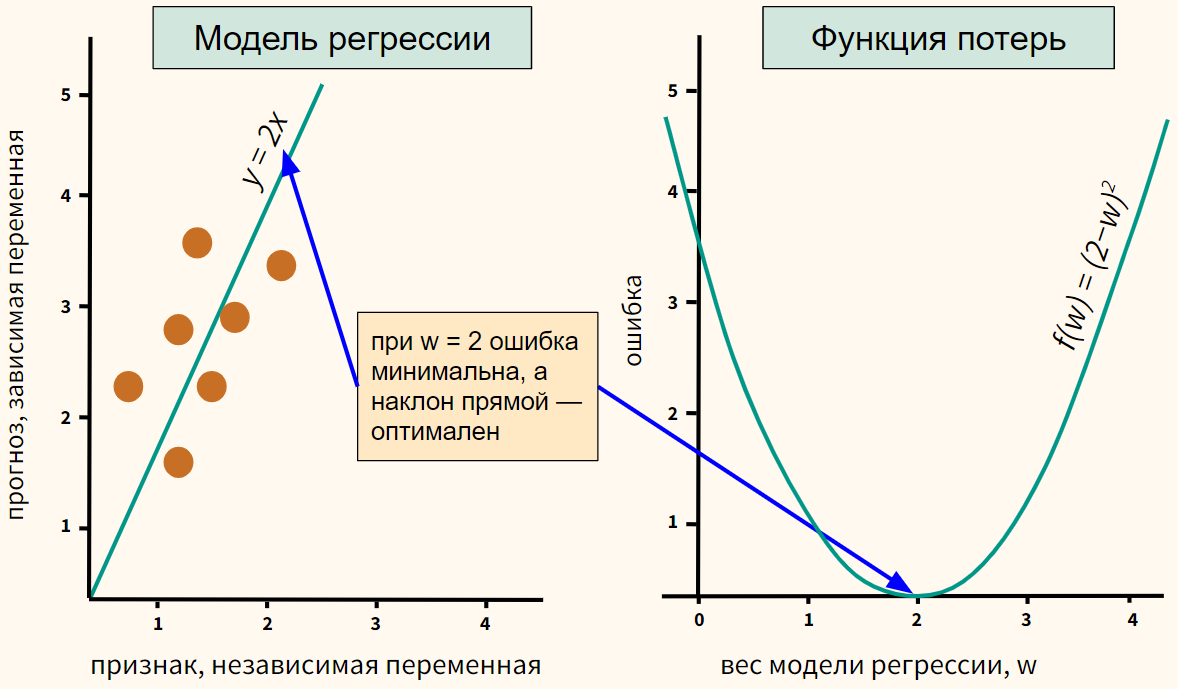

Тот вес $w$, при котором ошибка минимальна - оптимален. Именно его поиском и можно охарактеризовать задачу машинного обучения в случае линейной регрессии:

$w = argmin(F(Xw, y)) = argmin(F(\hat{y},y))$

В случае MSE:

$w = argmin(\cfrac{1}{n}\sum^n_{i=1}(y-\hat{y})^2)$

Однако как же найти этот вес? Если мы столкнемся с рабочей задачей - там уже точно признаков будет гораздо больше, а значит - и весов тоже?

Тут нам и поможет __производная__

## Понятие производной

__Производная__ - это скорость приращения функции в заданной точке.

Более простым языком: это __наклон__ касательной к функции в заданной точке, ведь именно наклон измеряет скорость изменения функции.

Например, в случае прямой $y = 2x + 3$ функция постоянно прирастает со скоростью 2 - касательная совпадет с графиком.

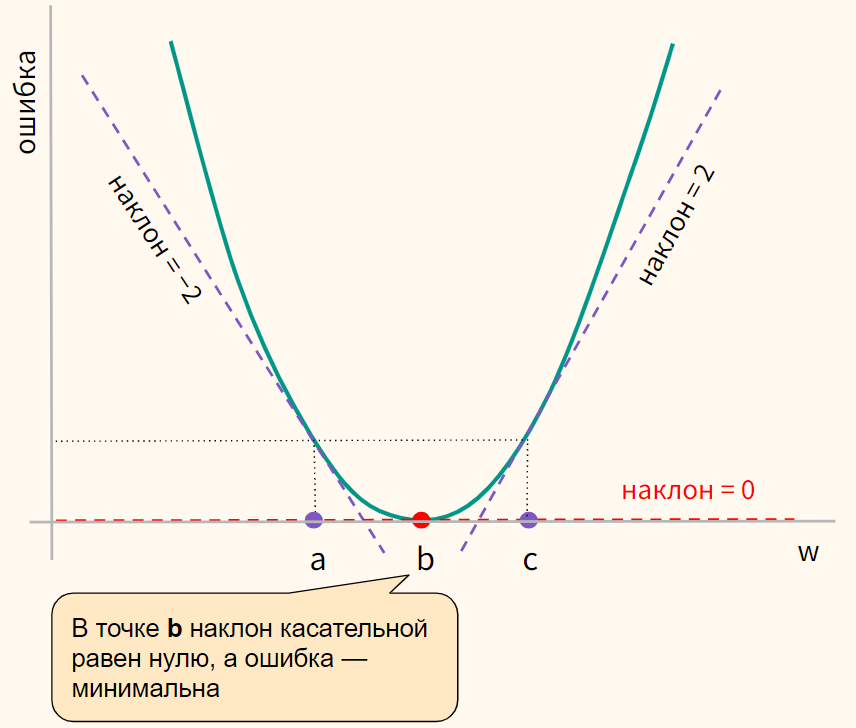

Как мы к этому пришли?

Начнем с более простого: вспомним о том, что наклон любой прямой равен тангенсу угла между прямой и осью икс.

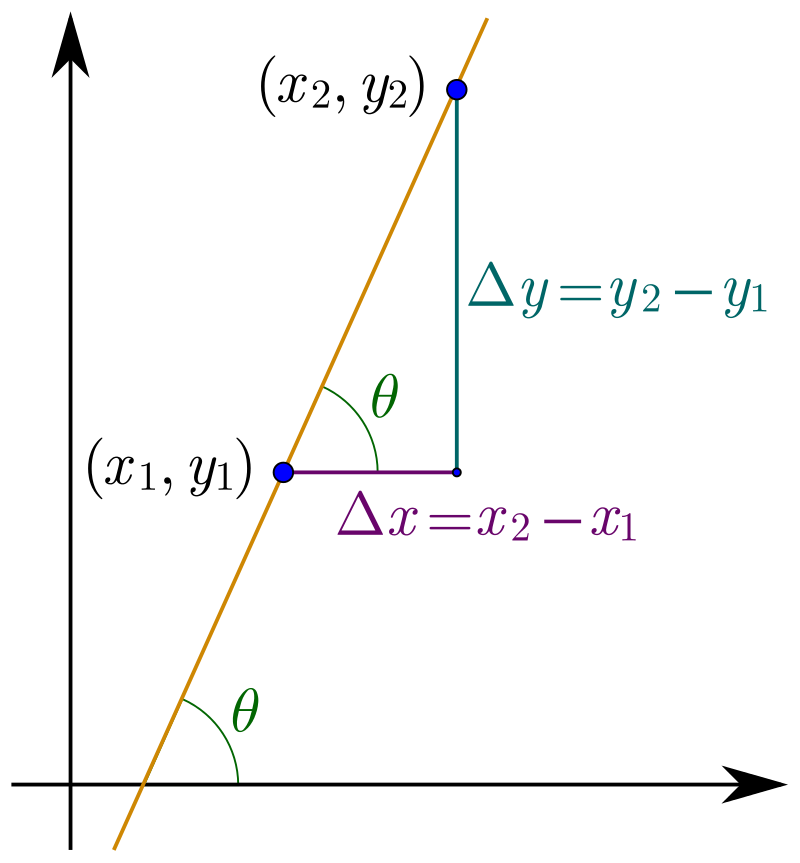


Помня это, проведем к нашей параболе секущую через точки ($w;f(w)$) и ($w+\Delta w$;$f(w+\Delta w$)).

Наклон секущей будет равен тангенсу угла между прямой и осью икс, или, если дорисовать треугольник как на графике выше - отношению приращения функции к приращению аргумента

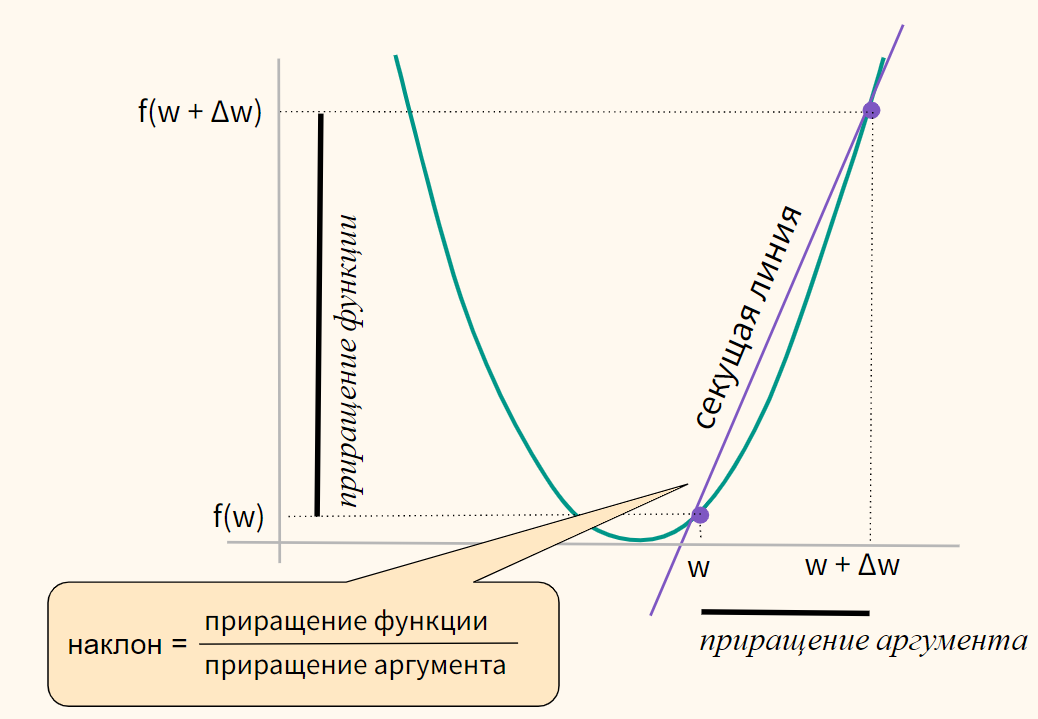



Наклон секущей будет равен $\cfrac{f(w + \Delta w) - f(w)}{\Delta w}$

Для того чтобы графически перейти от секущей к касательной мы можем представить, что бесконечно уменьшаем приращение аргумента Δw. Ещё говорят, что Δw стремится к нулю.

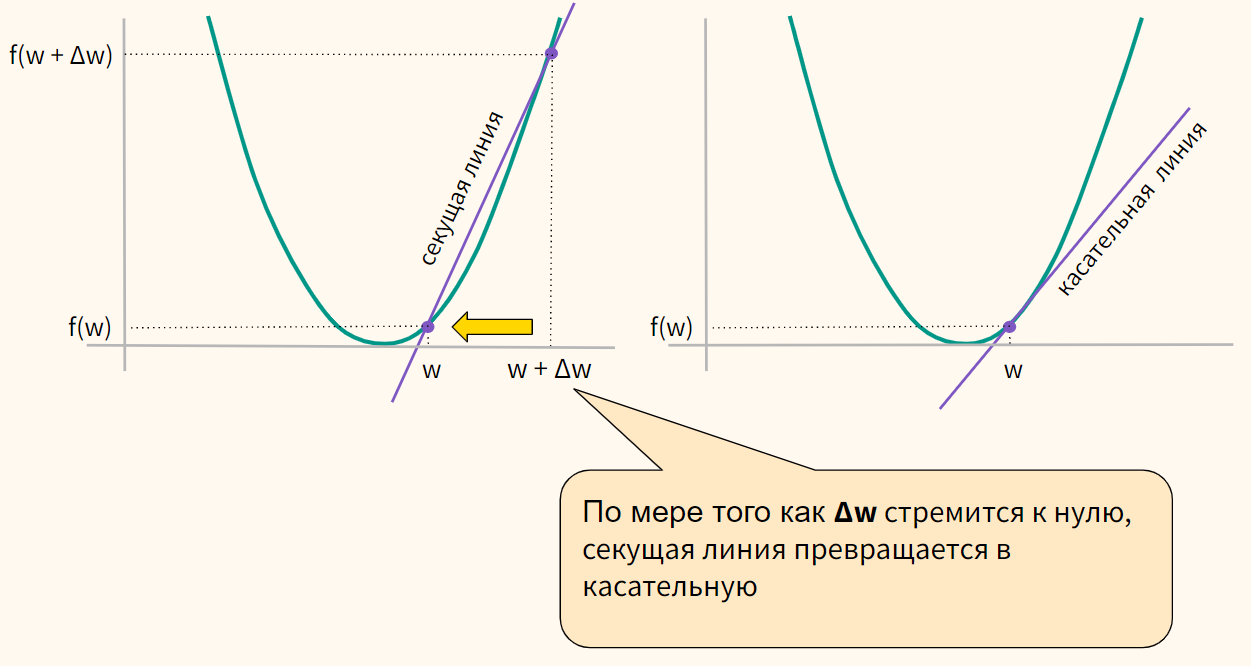

А чем ближе наше приращение к нулю - тем больше наша секущая похожа на касательную.

Держим это в уме - и найдем алгебраически производную для функции $f(w) = (2-w)^2$ (функция с нашего графика):

$f(w) = (2-w)^2$

$f'(w) = \cfrac{(2-(w+\Delta w))^2 - (2-w)^2}{\Delta w} = \cfrac{4 - 4(w+\Delta w) + (w+\Delta w)^2 -(4-4w +w^2) }{\Delta w} = \cfrac{4 - 4w - 4\Delta w + w^2 + 2w\Delta w + \Delta w^2 - 4 + 4w - w^2}{\Delta w}
$

$f'(w) = \cfrac{ - 4\Delta w + 2w\Delta w + \Delta w^2}{\Delta w} = \Delta w + 2w -4$

Учитывая то, что $\Delta w$ стремится к нулю - можем её отбросить:

$f'(w) = 2w - 4$

Такой способ - достаточно долгий и не очень приятный, благо сформированы несколько четких правил для таких преобразований.

## Производная и минимум функции

Зачем мы нашли производную? Остался последний кусочек паззла - __точки экстремума__.

__Точка экстремума функции__ - точка минимума или максимума функции; точка, после которой функция меняет свой характер: после убывания - возрастать, а после возрастания - убывать.

В __точке экстремума__ производная функции меняет свой знак

На графике выше точка b - экстремум, точка минимума параболической функции.

В __точке экстремума__ скорость приращения функции __равна нулю__.

А значит, производная функции в точке экстремума равна нулю.

Таким образом поиск такого $w$, при котором ошибка будет минимальной, сводится к решению уравнения

$F'(y,\hat{y})=0$, или $F'(y, Xw) = 0 $, где F - функция потерь

Для нашего примера:

$2w - 4 = 0$

$w = 2$

При $w=2$ ошибка минимальна.

Однако что делать, если точка экстремума - это точка максимума функции? Нам бы очень не хотелось получить максимально возможное значение ошибки.

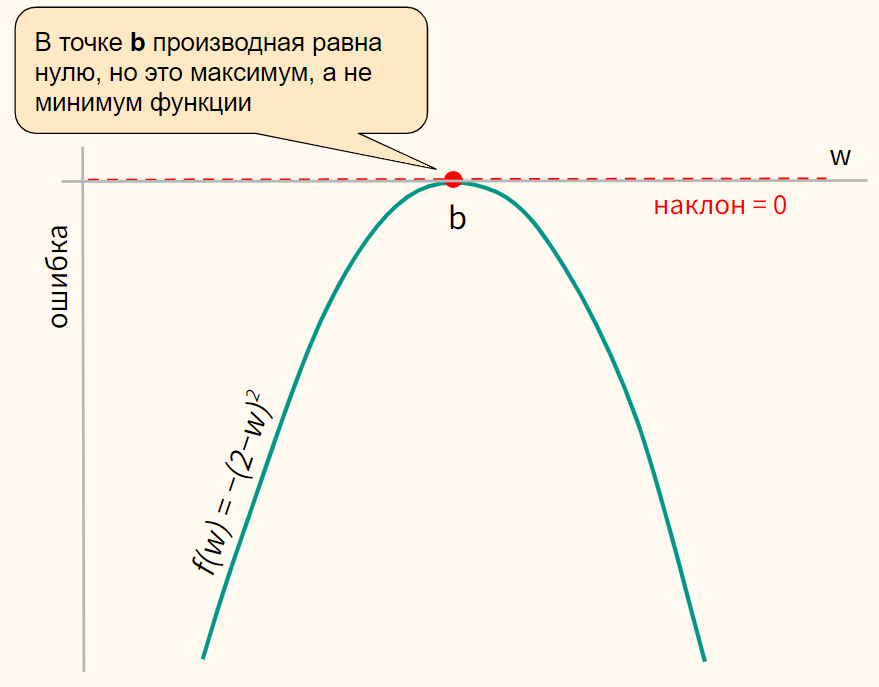

На этом этапе у нас остается одно - с помощью компьютера начать просчитывать различные $w$ - __численный метод оптимизации__

## Численный метод оптимизации

Однако же с подбором компьютером весов есть сложности.

Например, в __линейной регрессии__ компьютер выбирает начальные веса случайно (для нашего графика - точки a и c):

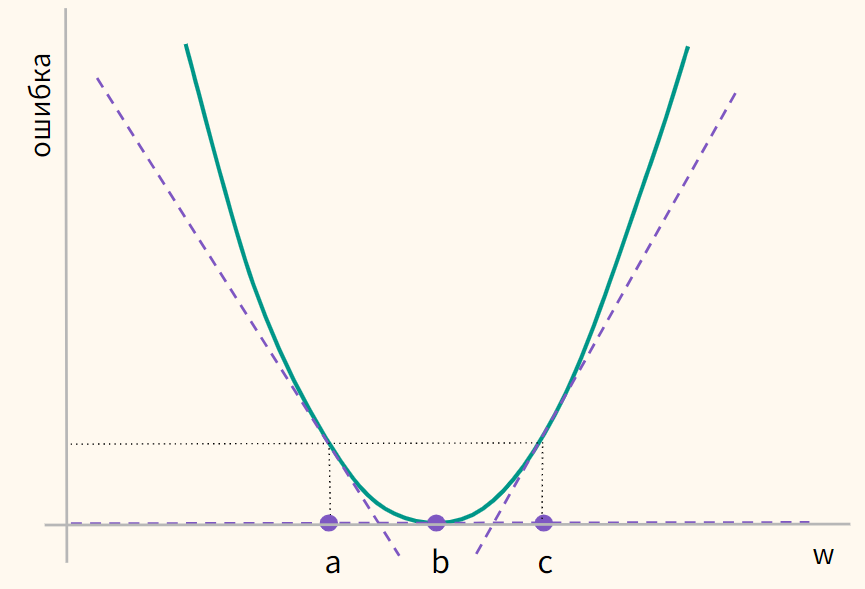

Как компьютер решит, в какую сторону ему начать двигаться по оси w (в какую сторону начать смещать веса), чтобы найти минимум? На большом объеме данный простой перебор всех вариантов неприемлем - займет очень много времени.

На самом деле, интуитивно всё достаточно понятно: производная функции в точке говорит нам, убывает эта функция, или возрастает: если производная больше нуля - возрастает; меньше - убывает.

Другими, помимо наклона-скорости приращения, производная указывает __направление скорейшего подъема__ по исходной функции - то есть с какой стороны находится локальный максимум функции.

Для нашего примера производная равна:

$f'(w) = 2w - 4$

Если мы возьмем $w=-3$:

$f'(w) = -6-4 = -10$

Производная функции в точке -3 равна -10. __Направление скорейшего подъема__ по функции - это сдвинуть w на минус 10, и действительно, в точке $w=-13$ значение функции гораздо больше, чем в точке -3

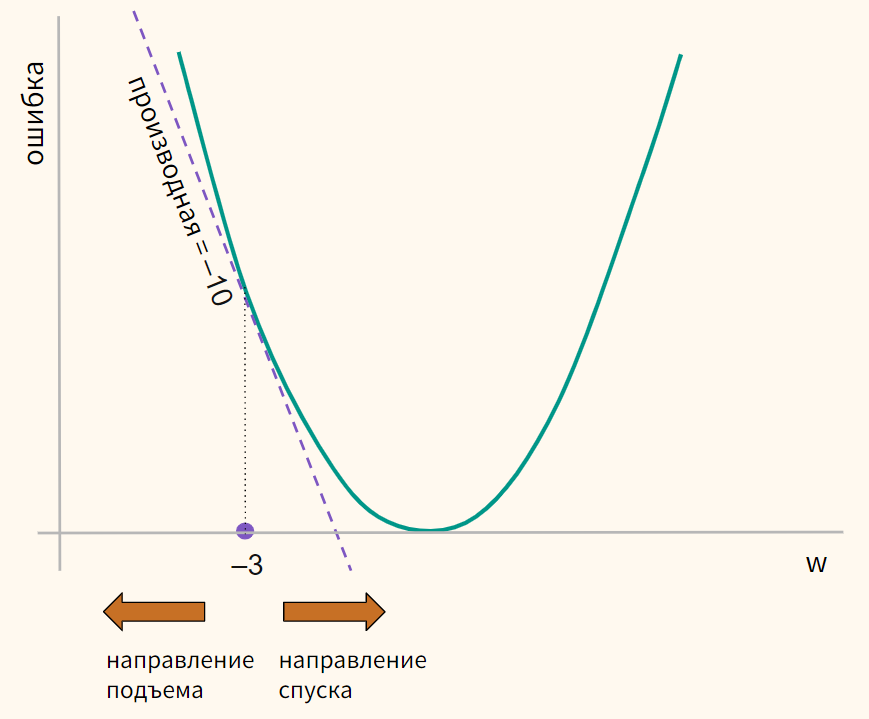

Если же мы хотим найти минимум - нам необходимо двигаться в обратную сторону от направления скорейшего подъема.

$-(-10)=10$

Попробуем сдвинуть w на 10 вправо:

$-3+10 = 7$

$f'(7) = 14 - 4 = 10$

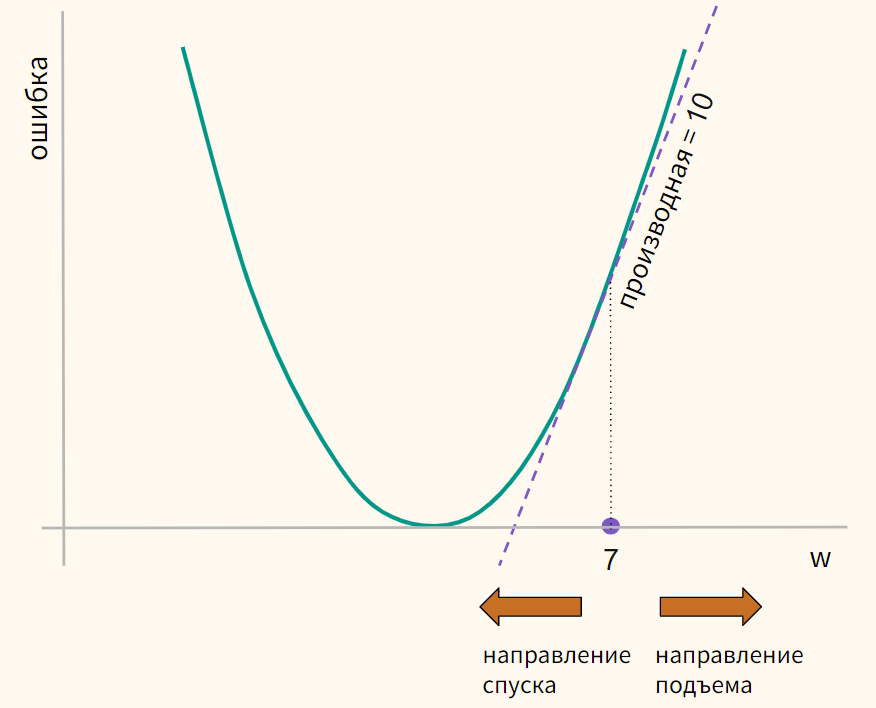

Все хорошо, только мы «перелетели» наш минимум. 

Попробуем сдвинуться по оси w не так сильно, умножив значение производной в точке на $\alpha = 0.05: 10 \times 0.05 = 0.5$

Сдвигаемся на 0,5 от начальной точки (-3), считаем производную:

$f'(-3+0.5) = -5 - 4 = -9$

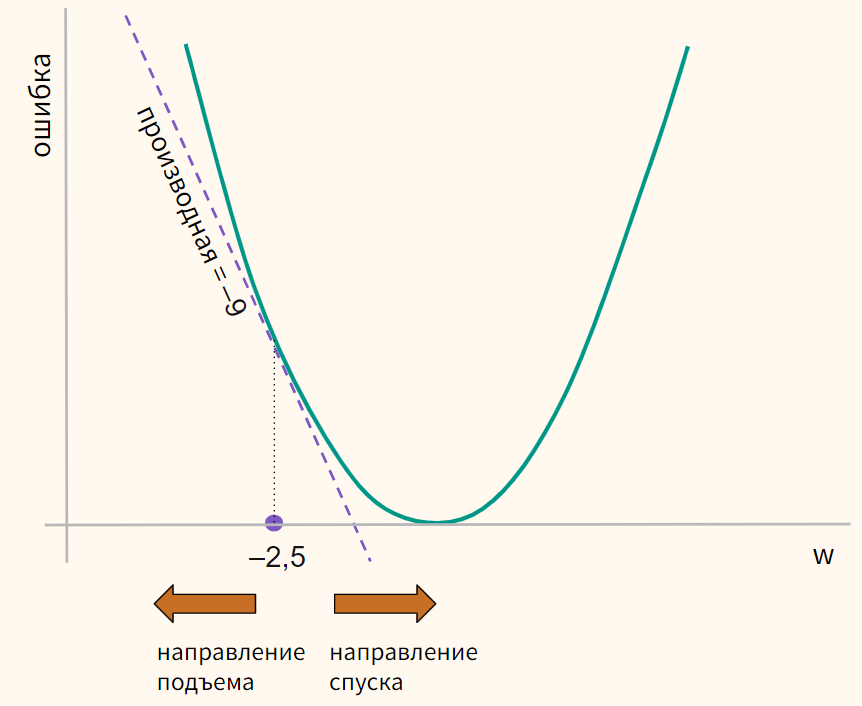

Производная равна минус 9, значит наш следующий шаг: $0.05 \times 9 = 0.45$:

$w = -2.5 + 0.45 = -2.05$

$f'(-2.05) = -4.1 - 4 = - 8.1$

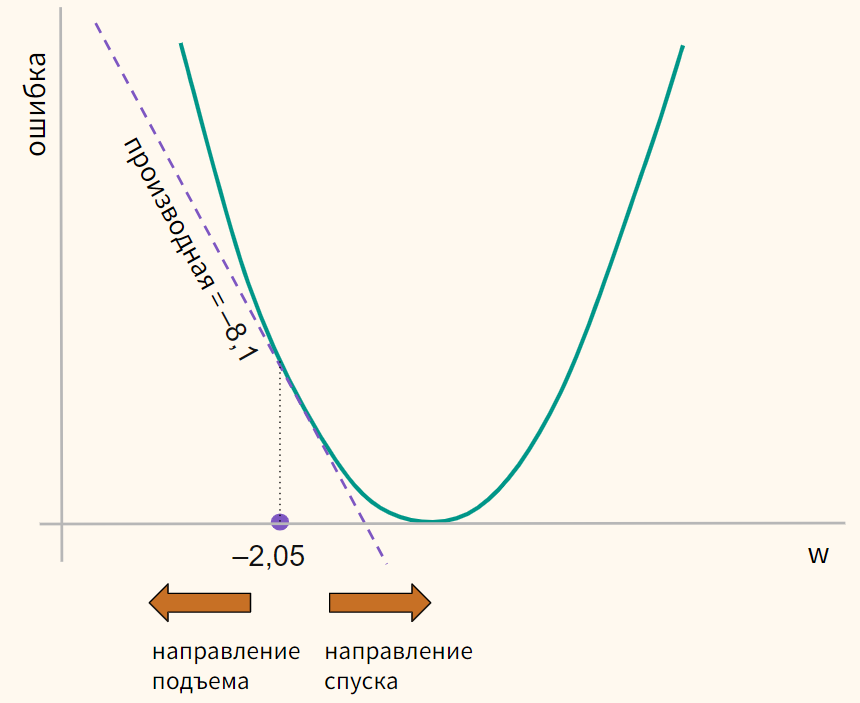

Таким образом мы и продолжим двигаться, пока не достигнем "дна" функции - её минимума

Реализуем такую штуку на питоне:

In [2]:
from matplotlib import pyplot as plt
import numpy as np

def func(x):
    return (2-x)**2
def derivative(x):
    return(2 * x - 4)
alpha = .05

wlist = []
derivative_list = []
error_list = []

iter = 100

w=-3

for i in range(iter):
    wlist.append(w)
    
    derivative_list.append(derivative(w))
    
    error_list.append(func(w))
    
    w -= alpha * derivative(w)
    
wlist[-5:],derivative_list[-5:],error_list[-5:]

([1.999775090188762,
  1.9997975811698858,
  1.9998178230528971,
  1.9998360407476075,
  1.9998524366728467],
 [-0.0004498196224758111,
  -0.0004048376602283632,
  -0.00036435389420574893,
  -0.0003279185047850852,
  -0.0002951266543065323],
 [5.05844231910703e-08,
  4.0973382784793914e-08,
  3.318844005572352e-08,
  2.6882636445121488e-08,
  2.1774935520541852e-08])

In [3]:
wlist[:3]

[-3, -2.5, -2.05]

In [4]:
derivative_list[:3]

[-10, -9.0, -8.1]

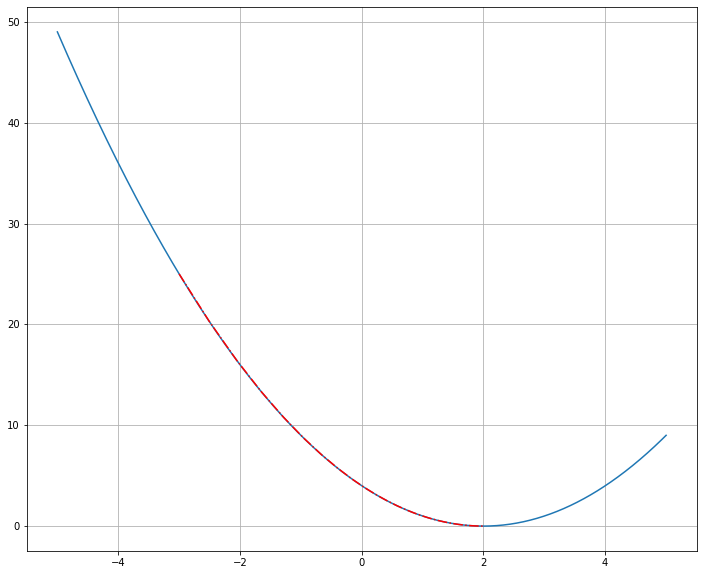

In [5]:
plt.figure(figsize=(12,10))
x = np.linspace(-5,5,1000)
y = func(x)
plt.plot(x,y)
plt.grid(True)


plt.plot(wlist, error_list, '-.', color='red')

In [6]:
wlist[::10]

[-3,
 0.2566077995000001,
 1.3921167270471537,
 1.7880442086239192,
 1.9260955852928274,
 1.9742311239633996,
 1.9910149485004278,
 1.9968671062589112,
 1.998907627497358,
 1.9996191132597707]

Если мы посмотрим на выборочные значения w, то увидим, что чем ближе к концу итерирования - тем меньше они меняются.

Учитывая то, что сдвиг напрямую зависит от $\alpha \times f'(w)$, можно сделать вывод, что, подходя ближе к минимуму, производная функции изменяется всё меньше - как и сама функция.

Это и позволяет подойти к определению __производной__: __производная__ характеризует __скорость__ изменения функции.

# Градиент и градиентный спуск

На этот раз мы попробуем найти веса для модели с несколькими переменными.

Функцию потерь возьмем такую:

$F(w_1,w_2) = w_1^2 + w_2^2$

На этот раз у нас получится трехмерный график с осями $w_1, w_2\ и\ F(w_1,w_2)$.

Построим его:

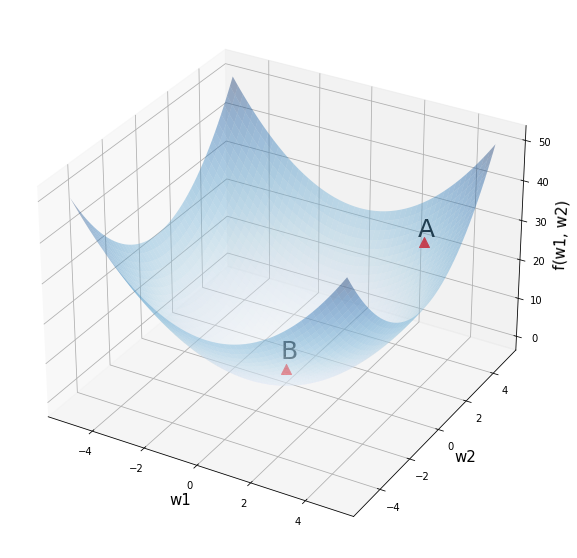

In [7]:
# установим размер графика
fig = plt.figure(figsize = (12,10))
 
# создадим последовательность из 1000 точек в интервале от -5 до 5
# для осей w1 и w2
w1 = np.linspace(-5, 5, 1000)
w2 = np.linspace(-5, 5, 1000)
 
# создадим координатную плоскость из осей w1 и w2
w1, w2 = np.meshgrid(w1, w2)
 
# пропишем функцию
f = w1 ** 2 + w2 ** 2
 
# создадим трехмерное пространство
ax = fig.add_subplot(projection = '3d')
 
# выведем график функции, alpha задает прозрачность
ax.plot_surface(w1, w2, f, alpha = 0.4, cmap = 'Blues')
 
# выведем точку A с координатами (3, 4, 25) и подпись к ней
ax.scatter(3, 4, 25, c = 'red', marker = '^', s = 100)
ax.text(3, 3.5, 28, 'A', size = 25)
 
# аналогично выведем точку B с координатами (0, 0, 0)
ax.scatter(0, 0, 0, c = 'red', marker = '^', s = 100)
ax.text(0, -0.4, 4, 'B', size = 25)
 
# укажем подписи к осям
ax.set_xlabel('w1', fontsize = 15)
ax.set_ylabel('w2', fontsize = 15)
ax.set_zlabel('f(w1, w2)', fontsize = 15)
 
# выведем результат
plt.show()

А теперь сама задача: предположим, мы находимся в точке A. Как нам спуститься в точку B? Просто двигаться в направлении обратном производной мы не можем. Ведь единственной производной, которая бы описывала все изменения нашей функции, просто не существует.

## Частная производная

Если мы уберем ось f(w1,w2) - то есть посмотрим на график как бы сверху - увидим, что у нас теперь 2 направления движения: по оси w1 и w2, а не только по w, как в предыдущем примере с параболой:

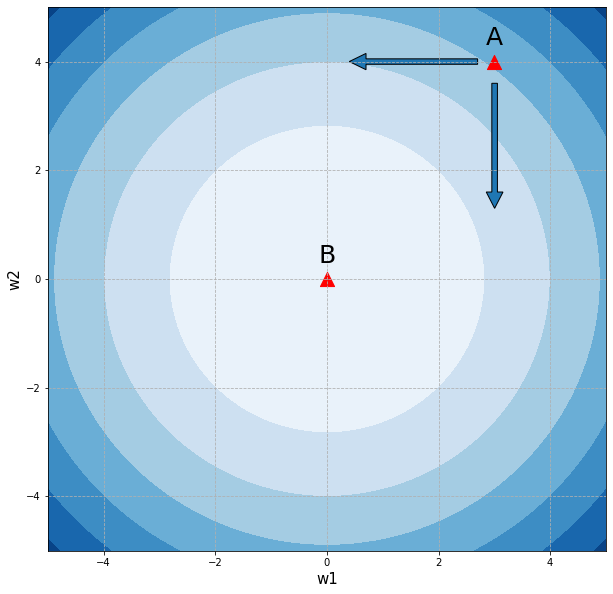

In [8]:
# установим размер графика
fig, ax = plt.subplots(figsize = (10,10))
 
# создадим последовательность из 100 точек в интервале от -5 до 5
# для осей w1 и w2
w1 = np.linspace(-5.0, 5.0, 100)
w2 = np.linspace(-5.0, 5.0, 100)
 
# создадим координатную плоскость из осей w1 и w2
w1, w2 = np.meshgrid(w1, w2)
 
# пропишем функцию
C = w1 ** 2 + w2 ** 2
 
# построим изолинии (линии уровня)
plt.contourf(w1, w2, C, cmap = 'Blues')
 
# выведем точку А с координатами на плоскости (3, 4)
ax.scatter(3, 4, c = 'red', marker = '^', s = 200)
ax.text(2.85, 4.3, 'A', size = 25)
 
# и точку B с координатами (0, 0)
ax.scatter(0, 0, c = 'red', marker = '^', s = 200)
ax.text(-0.15, 0.3, 'B', size = 25)
 
# укажем подписи к осям
ax.set_xlabel('w1', fontsize = 15)
ax.set_ylabel('w2', fontsize = 15)
 
# а также стрелки направления изменений вдоль w1 и w2
ax.arrow(2.7, 4, -2, 0, width = 0.1, head_length = 0.3)
ax.arrow(3.005, 3.6, 0, -2, width = 0.1, head_length = 0.3)
 
# создадим сетку в виде прерывистой черты
plt.grid(linestyle = '--')
 
# выведем результат
plt.show()

Для таких случаев мы поступаем следующим образом: дифференцируем функцию по одной переменной, а вторую принимаем за константу - и при дифференцировании она превратится в ноль:

$f'(w_1) = 2w_1$
$f'(w_2) = 2w_2$

Геометрически - мы делаем сечение плоскости, и ищем производную для каждой координаты по отдельности.

Такая производная называется __частной (partial derivative)__, потому что она описывает изменение только в первой переменной w1.

И теперь если взять произвольную точку в рамках координатной плоскости $w_1,w_2$, например, (2;1):

$f'(2) = 4, f'(1) = 2$

Мы знаем направление скорейшего подъема и расстояния для сдвига для каждого из направлений.

## Градиент

__Градиент__ - это совокупность частных производных, или их вектор. Также его можно назвать __полной производной__

Нотация производится с помощью символа $\nabla$:

$\nabla f(w_1,w_2) = [2w_1\ 2w_2]$

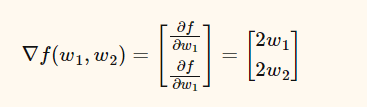

Если мы посмотрим, чему равен градиент функции в точке (3;4) в новой записи:

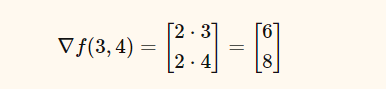

Такая функция на входе принимает два числа, а на выходе выдает вектор, также состоящий из двух чисел. В этом случае говорят о __вектор-функции (vector-valued function).__

## Метод градиентного спуска

Найденный градиент показывает, в какую сторону нам двигаться, чтобы функция росла. Нас же интересует __антиградиент__ - градиент для уменьшения значения функции:

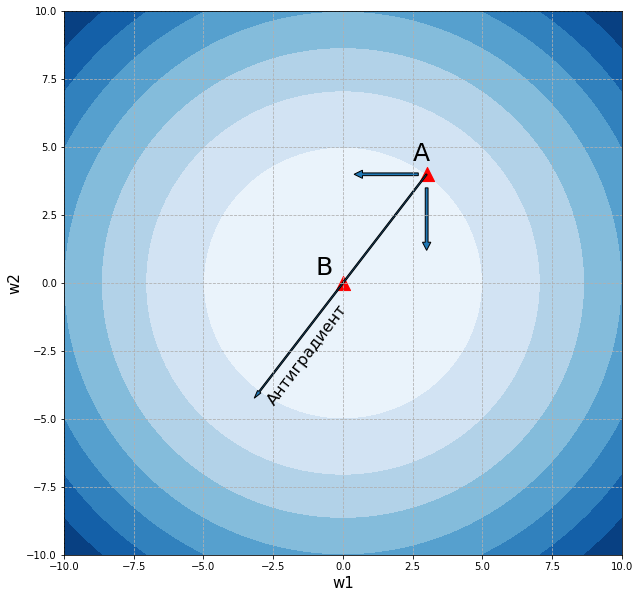

In [9]:
# установим размер графика
fig, ax = plt.subplots(figsize = (10,10))
 
# создадим последовательность из 100 точек в интервале от -10 до 10
# для осей w1 и w2
w1 = np.linspace(-10.0, 10.0, 100)
w2 = np.linspace(-10.0, 10.0, 100)
 
# создадим координатную плоскость из осей w1 и w2
w1, w2 = np.meshgrid(w1, w2)
 
# пропишем функцию
C = w1 ** 2 + w2 ** 2
 
# построим изолинии (линии уровня)
plt.contourf(w1, w2, C, cmap = 'Blues')
 
# выведем точку А с координатами на плоскости (3, 4)
ax.scatter(3, 4, c = 'red', marker = '^', s = 200)
ax.text(2.5, 4.5, 'A', size = 25)
 
# и точку B с координатами (0, 0)
ax.scatter(0, 0, c = 'red', marker = '^', s = 200)
ax.text(-1, 0.3, 'B', size = 25)
 
# укажем подписи к осям
ax.set_xlabel('w1', fontsize = 15)
ax.set_ylabel('w2', fontsize = 15)

# а также стрелки направления изменений вдоль w1 и w2
ax.arrow(2.7, 4, -2, 0, width = 0.1, head_length = 0.3)
ax.arrow(3, 3.5, 0, -2, width = 0.1, head_length = 0.3)
 
# выведем вектор антиградиента с направлением (-6, -8)
ax.arrow(3, 4, -6, -8, width = 0.05, head_length = 0.3)
ax.text(-2.8, -4.5, 'Антиградиент', rotation = 53, size = 16)
 
# создадим сетку в виде прерывистой черты
plt.grid(linestyle = '--')
 
# выведем результат
plt.show()

Если мы из точки (3;4) двинемся на -6 и -8 по осям - то есть двинемся по антиградиенту - мы обязательно пройдем через точку В - точку минимума.

Однако если мы сдвинемся на весь антиградиент - точку мы перескочим. Здесь мы снова приходим к __learning rate - скорости обучения - коэффициенту $\alpha$__

Итак, определение:

__Метод градиентного спуска__ — это способ нахождения локального минимума функции в процессе движения в направлении антиградиента

In [10]:
w1, w2 = 3,4

iter = 100


def func(w1, w2):
    return w1**2 + w2**2

def derivative(w):
    return 2*w

w1_list = []
w2_list = []

error_list = []

learning_rate = .15

for i in range(iter):
    w1_list.append(w1)
    w2_list.append(w2)
    
    error_list.append(func(w1,w2))
    
    w1 = w1 - learning_rate * derivative(w1)
    w2 = w2 - learning_rate * derivative(w2)

error_list[:10], w1_list[:10], w2_list[:10]

([25,
  12.25,
  6.0025,
  2.941225,
  1.44120025,
  0.7061881225000002,
  0.3460321800250001,
  0.16955576821225005,
  0.08308232642400253,
  0.04071033994776124],
 [3,
  2.1,
  1.4700000000000002,
  1.0290000000000001,
  0.7203000000000002,
  0.5042100000000002,
  0.3529470000000001,
  0.24706290000000009,
  0.17294403000000008,
  0.12106082100000007],
 [4,
  2.8,
  1.96,
  1.3719999999999999,
  0.9603999999999999,
  0.67228,
  0.470596,
  0.3294172,
  0.23059204,
  0.161414428])

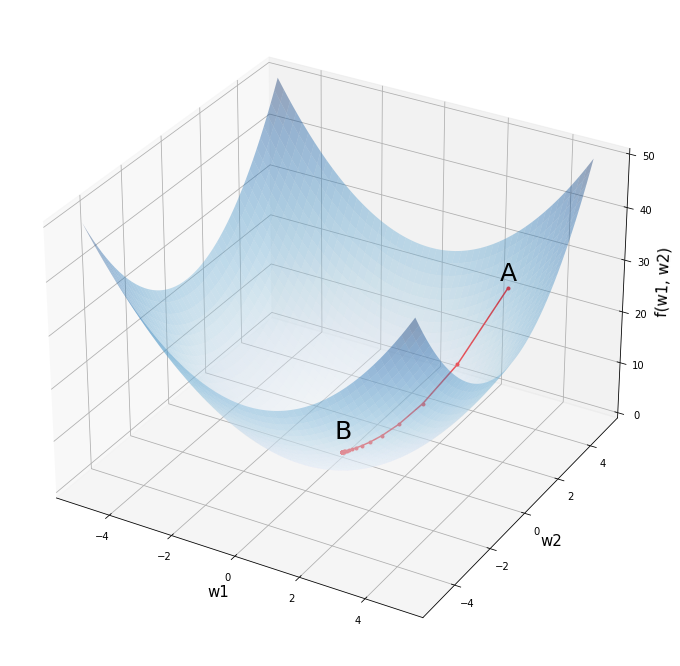

In [11]:
fig = plt.figure(figsize = (14,12))
 
w1 = np.linspace(-5, 5, 1000)
w2 = np.linspace(-5, 5, 1000)
 
w1, w2 = np.meshgrid(w1, w2)
 
f = w1 ** 2 + w2 ** 2
 
ax = fig.add_subplot(projection = '3d')
 
ax.plot_surface(w1, w2, f, alpha = 0.4, cmap = 'Blues')
 
ax.text(3, 3.5, 28, 'A', size = 25)
ax.text(0, -0.4, 4, 'B', size = 25)
 
ax.set_xlabel('w1', fontsize = 15)
ax.set_ylabel('w2', fontsize = 15)
ax.set_zlabel('f(w1, w2)', fontsize = 15)
 
# выведем путь алгоритма оптимизации
ax.plot(w1_list, w2_list, error_list, '.-', c = 'red')
 
plt.show()

1. __Градиент показывает скорость__ изменения многомерной функции по каждому из измерений (по каждой из переменных)
2. Если «заморозить» все независимые переменные кроме одной и сделать срез, то наклон касательной к кривой среза будет значением частной производной по этому измерению.
3. __Градиент показывает направление скорейшего подъёма__ (возрастания) функции. Двигаясь в обратном направлении, мы придем к минимуму функции.

## Решение методом градиентного спуска

Давайте попробуем решить задачу минимизации функции потерь с помощью __градиентного спуска__ на примере.

Предположим, наша функция предсказаний:

$y = wx + b$

Функция потерь:

$MSE = \cfrac{1}{n}\sum_{i=1}^n(y_i - (wx_i + b))^2$

Алгоритм решения:
1. Ищем градиент функции потерь
2. Выбираем начальную точку спуска - значения переменных; $x_0$
3. Определяем направление скорейшего подъема
4. Выбираем шаг - __learning rate__
5. Спускаемся до минимума.

$MSE' = [\cfrac{\delta MSE}{\delta w}(\cfrac{1}{n}\sum_{i=1}^n(y_i - (wx_i + b))^2), \cfrac{\delta MSE}{\delta b}(\cfrac{1}{n}\sum_{i=1}^n(y_i - (wx_i + b))^2)]$

Для поиска градиента мы ищем производную функции для каждой из переменных, все остальные принимая за константу. Для упрощения дифференциации приведем производные к векторизованным:

$MSE' = [\cfrac{\delta MSE}{\delta w}(\cfrac{1}{n}(y - (wx + b))^2), \cfrac{\delta MSE}{\delta b}(\cfrac{1}{n}(y - (wx + b))^2)]$


Начнем с $\cfrac{\delta MSE}{\delta w}$. Производная вложенных функций равная произведению производной внешней функции на производную внутренней функции:

$(\cfrac{1}{n}(y - (wx + b))^2)' = \cfrac{1}{n} 2 (y - (wx + b)) \cfrac{\delta MSE}{\delta w} (y- (wx+b)) = (*)$

В примере выше y - константа, b - константа, x - тоже константа; дифференцируя по $w$, мы снизим его степень - превратим в единицу (степень будет равна нулю):

$(*) = \cfrac{2}{n}(y - wx - b)(-x) = \cfrac{2}{n} (wx^2 + bx - xy)$

Проведем аналогичные операции по b:

$\cfrac{\delta MSE}{\delta b}\ (\cfrac{1}{n}(y - (wx + b))^2) = \cfrac{1}{n} 2 (y - (wx + b)) \cfrac{\delta MSE}{\delta b} (y- (wx+b)) = \cfrac{2}{n} (y - wx - b) (0 - (0 + 1)) = \cfrac{2}{n}\ (b + wx - y)$

Градиент найден. Засунем всё в питона и посмотрим, что получилось.

Что нам здесь нужно:
1. Прописать функцию ошибок, функцию предсказаний, функцию производной/функции градиента
2. Определить __learning rate__ и кол-во итераций (гиперпараметры)
3. На каждой итерации:
- собираем значения $w, b, MSE$ 
- делаем сдвиг по каждой из переменных и меняем $w\ и\ b$

Данные - статистика по объему обхвата шеи и росту у женщин:

In [12]:
X = np.array([1.48, 1.49, 1.49, 1.50, 1.51, 1.52, 1.52, 1.53, 1.53, 1.54, 1.55, 1.56, 1.57, 1.57, 1.58, 1.58, 1.59, 1.60, 1.61, 1.62, 1.63, 1.64, 1.65, 1.65, 1.66, 1.67, 1.67, 1.68, 1.68,  1.69, 1.70, 1.70, 1.71, 1.71, 1.71, 1.74, 1.75, 1.76, 1.77, 1.77, 1.78])
y = np.array([29.1, 30.0, 30.1, 30.2, 30.4, 30.6, 30.8, 30.9, 31.0, 30.6, 30.7, 30.9, 31.0, 31.2, 31.3, 32.0, 31.4, 31.9, 32.4, 32.8, 32.8, 33.3, 33.6, 33.0, 33.9, 33.8, 35.0, 34.5, 34.7, 34.6, 34.2, 34.8, 35.5, 36.0, 36.2, 36.3, 36.6, 36.8, 36.8, 37.0, 38.5])


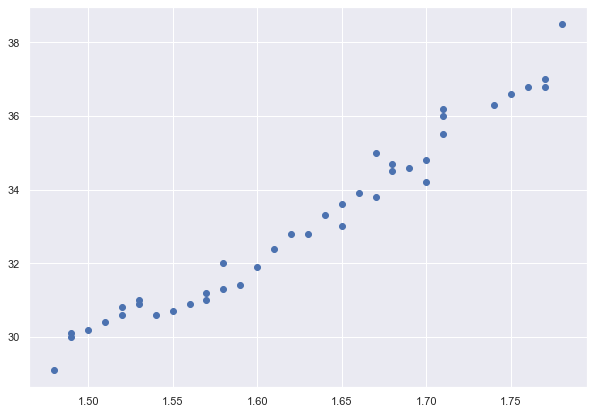

In [13]:
sns.set()
fig = plt.figure(figsize=(10,7))
plt.scatter(X,y)

Налицо очень явная линейная зависимость. Для учебного примера - в самый раз

In [14]:
def gradient_descendance(w,b,X,y, learning_rate, iter):    
    def pred(w, b, X):
        return w*X + b

    def error_func(w,b,X, answers):
        return np.sum(answers - pred(w,b,X))**2 / len(answers)

    def gradient_w(w, b, X, y):
        return np.sum(2/len(y) * (w * X**2 + b*X - X*y))

    def gradient_b(w,b , X, y):
        return np.sum(2/len(y) * (b + w * X - y))



    w_list, b_list, error_list = [], [], []

    w = 0
    b = 0

    for i in range(iter):
        w_list.append(w)
        b_list.append(b)

        error = error_func(w,b,X,y)
        error_list.append(error)

        w1 = w - gradient_w(w,b,X,y) * learning_rate
        b1 = b - gradient_b(w,b,X,y) * learning_rate

        w, b = w1, b1
    
    
    return w, b
    
    

In [15]:
w, b = gradient_descendance(0,0,X,y,.1,10000)
w, b

(26.691896565938286, -10.29408874579835)

Мы получили наши коэффициенты w и b. Построим график:

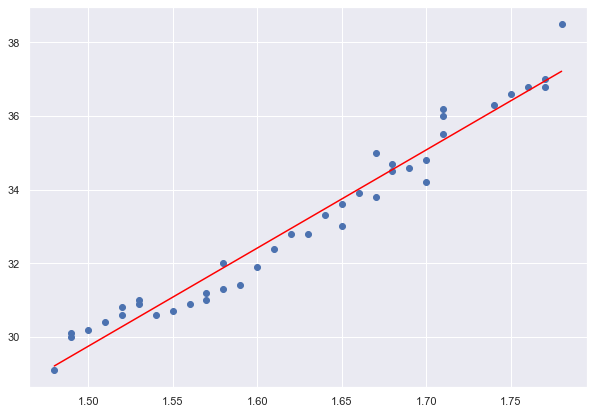

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(X,y)
y_pred = w * X + b
plt.plot(X, y_pred, color='red')

Посмотрим на размер ошибки:


In [17]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, y_pred)

0.22756439885690716

Построим модель линейной регрессии и сравним результаты:

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape(-1,1), y)
lr.coef_, lr.intercept_

(array([26.86181201]), -10.570936299787334)

In [19]:
w, b

(26.691896565938286, -10.29408874579835)

Как мы видим, результаты сопоставимы. Попробуем сделать больше итераций:

In [20]:
w, b = gradient_descendance(0,0,X,y,.1,100000)

In [21]:
w,b

(26.861812005566996, -10.57093629978282)

In [22]:
mean_squared_error(y,lr.predict(X.reshape(-1,1)))

0.2273395626677337

In [23]:
mean_squared_error(y, w* X + b)

0.22733956266773364

Ошибка у нашего метода получилась даже чуть меньше :)

Упакуем всё в класс для более удобного доступа к атрибутам:

In [24]:
class gradient_descender:
    
    def __init__(self):
        self.w_list = []
        self.b_list = []
        self.error_list = []
    
        
    def pred(self,w, b, X):
        return w*X + b

    def error_func(self,w,b,X, answers):
        return np.sum(answers - self.pred(w,b,X))**2 / len(answers)

    def gradient_w(self,w, b, X, y):
        return np.sum(2/len(y) * (w * X**2 + b*X - X*y))

    def gradient_b(self,w,b , X, y):
        return np.sum(2/len(y) * (b + w * X - y))

    
    
    def fit(self,w,b,X,y, learning_rate, iter):
        self.w = w
        self.b = b
        for i in range(iter):
            
            self.w_list.append(self.w)
            self.b_list.append(self.b)

            error = self.error_func(self.w,self.b,X,y)
            self.error_list.append(error)
            
            
            self.error = error

            w1 = self.w - self.gradient_w(self.w,self.b,X,y) * learning_rate
            b1 = self.b - self.gradient_b(self.w,self.b,X,y) * learning_rate

            self.w, self.b = w1, b1




In [25]:
gd = gradient_descender()

In [26]:
gd.fit(0,0,X,y,.1,100000)

In [27]:
gd.w, gd.b,gd.error

(26.861812005566996, -10.57093629978282, 8.007130593092104e-28)

Посмотрим, как сдвигались переменные:

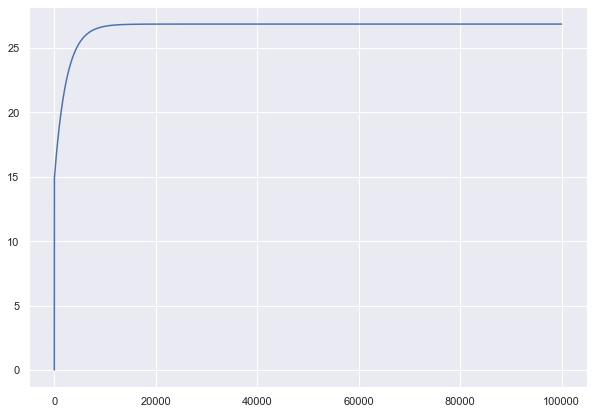

In [28]:
plt.figure(figsize=(10,7))
plt.plot(gd.w_list)

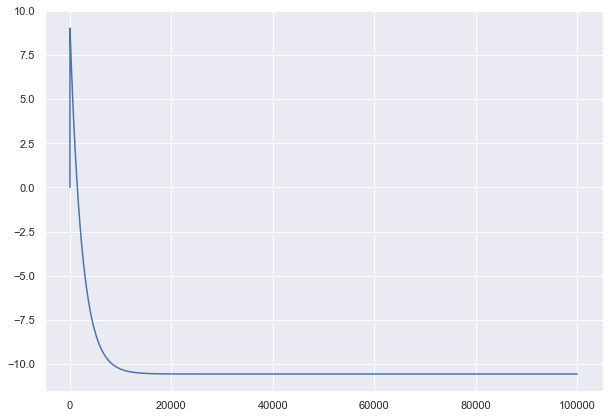

In [29]:
plt.figure(figsize=(10,7))
plt.plot(gd.b_list)

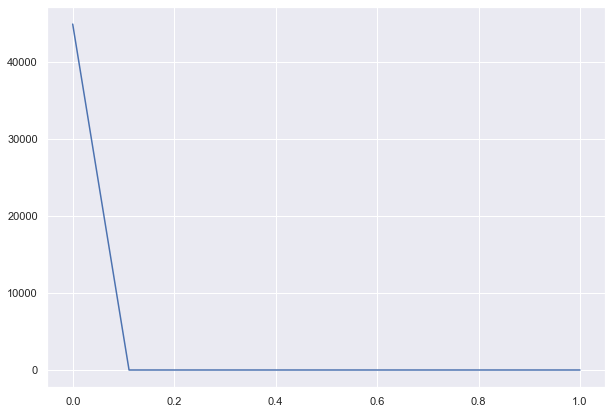

In [30]:
plt.figure(figsize=(10,7))
plt.plot(np.linspace(0,1,len(gd.error_list[::10000])),gd.error_list[::10000])

## Градиент и классификация

В случае задачи классификации и использования такой функции потерь, как __accuracy__, воспользоваться этим методом не получится - функция __accuracy__ не имеет производной.

Поэтому мы воспользуемся функцией __отрицательного логарифмического правдоподобия__:

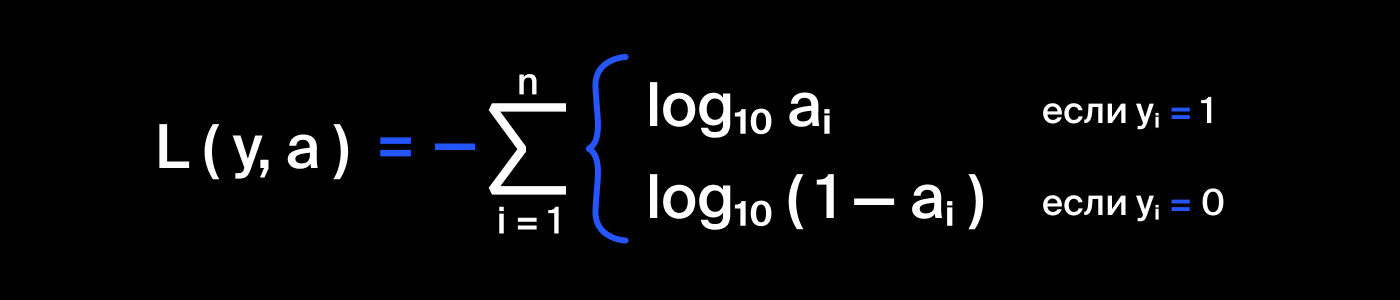

где aᵢ — вероятность класса 1 для объекта с индексом i. 

То есть значение aᵢ должно быть как можно выше у объекта положительного класса и ниже — у объекта отрицательного класса.

Эта функция превращает диапазон значений сначала в $(-\infty;0)$, а затем с помощью минуса переворачивает диапазон значений в $(0;+\infty)$

## Стохастический градиентный спуск

Даже решение градиентным спуском может потребовать огромного кол-ва времени для большого датасета.

Для того, чтобы это время выиграть, градиентный спуск выполняют на небольшом куске данных - __батче, или мини-батче__.

А чтобы модель проанализировала все данные - на каждой итерации батчи меняют.

Такой метод называют __стохастический градиентный спуск, SGD__

Визуально алгоритм можно представить вот так:

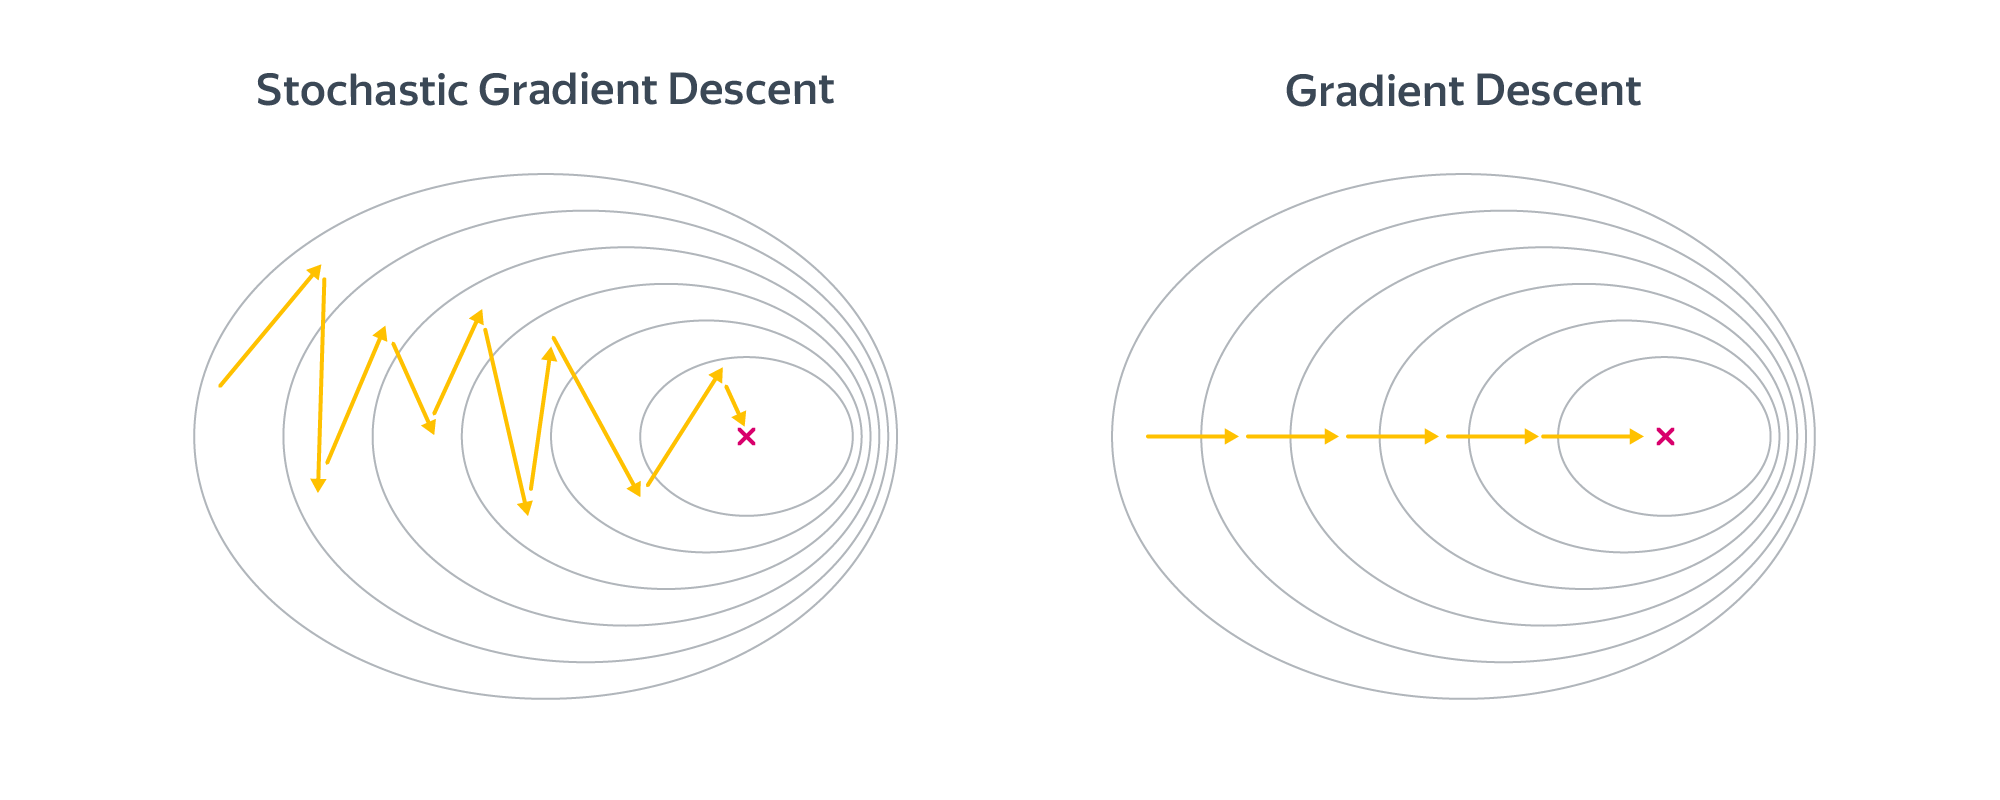

В __одном батче__ обычно находится __100-200 объектов__

Когда алгоритм проходит по всем батчам - заканчивается __эпоха__

Шаги стохастического градиентного спуска заметно более шумные, но считать их получается значительно быстрее. В итоге они тоже сходятся к оптимальному значению из-за того, что матожидание оценки градиента на батче равно самому градиенту.

$MSE = \cfrac{1}{n}\ \sum_{i=1}^n(y_i-\hat{y_i})^2$

Так выглядит наша формула функции потерь.

В векторном виде:

$MSE = \cfrac{1}{n} <y-\hat{y}, y-\hat{y}>$ - сумма и квадрат представлены в виде скалярного произведения: ведь скалярное произведение векторов это сумма попарных произведений координат вектора.

Для линейной регрессии:

$MSE = \cfrac{1}{n} <y-Xw,y-Xw>$

Чтобы произведение получилось в матричном виде - первую половину нужно транспонировать. Именно первую, поскольку при умножении матриц размерностью $nx1$, чтобы получилось одно число, нужно умножить размерности $1xn\ на\ nx1$, иначе получится квадратная матрица

$MSE = \cfrac{1}{n} (y - Xw)^T(y-Xw)$

Раскроем скобки:

$MSE = \cfrac{1}{n}\ y^Ty - y^TXw - (Xw)^Ty + (Xw)^TXw$

Теперь необходимо произвести преобразования:

$y^TXw = (Xw)^Ty = w^TX^Ty$

Как это получилось? Все дело в размерах:

$y^TXw:\ (1\ \times\ n)\ \times\ (n\ \times\ k)\ \times\ (k\ \times\ 1) = 1\ \times\ 1$

То же самое касается и остальных частей уравнения выше: как бы мы не перемножали, каждый раз будет получаться одно и то же значение

Далее:

$(Xw)^TXw = w^TX^TXw$ - тут по правилу раскрытия скобок транспонирования всё очевидно

Соберем уравнение (и уберем n влево):

$nMSE = w^TX^TXw - 2w^TX^Ty +y^Ty$


Теперь - найдем его градиент в общем случае - по $w$:



$nMSE' = \cfrac{d(w^TX^TXw - 2w^TX^Ty +y^Ty)}{dw}$

Далее - снова ряд преобразований:
1. $(w^TX^TXw)' = 2X^TXw$
2. $(2w^TX^Ty)' = 2X^Ty$
3. $y^Ty = 0$

И если со вторым преобразованием всё очевидно - степень $w$ снизилась до 0, она превратилась в 1 - и мы её убрали - то со вторым нужно разобраться.

Заглянем под капот первому выражению:

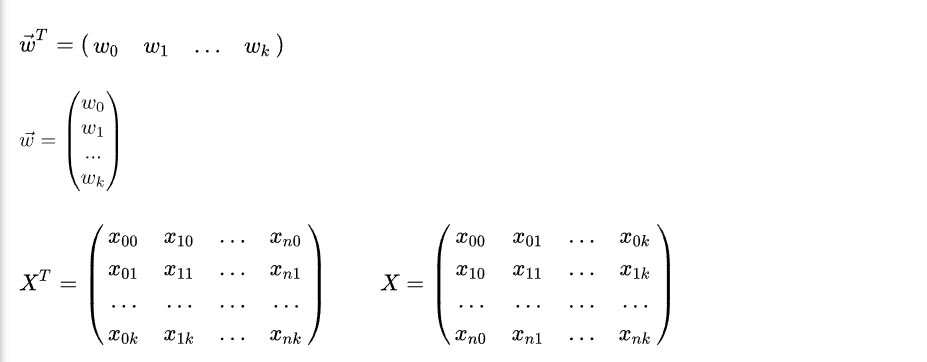

Заменим $X^TX$ на матрицу A. Матрица А - квадратная и симметричная. Получим:

$w^TAw$

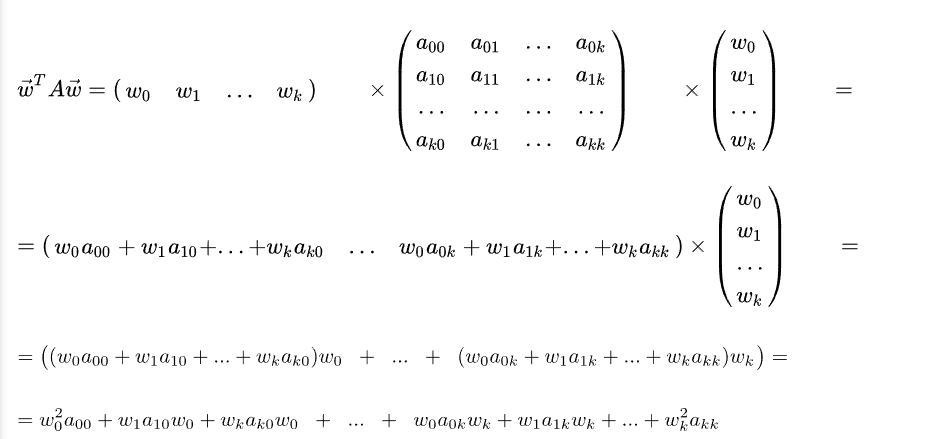

Выглядит страшно - но на самом деле на выходе мы получим всего лишь число.

Если дифференцировать поэлементно для каждого $w_i$, мы получим вектор размерности $k\ \times\ 1$:

$w_0$:

$2w_0a_{00} + w_1a_{10} + w_2a_{20} + ... + w_ka_{0k}$

Дифференцируя далее по каждому w, на выходе получим:

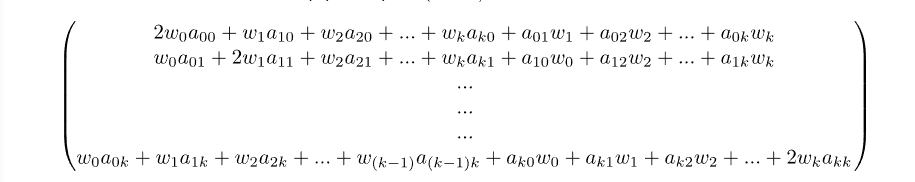

Если мы посмотрим внимательнее, то увидим, что можно попарно вынести у некоторых слагаемых коэффициенты $w_i$:

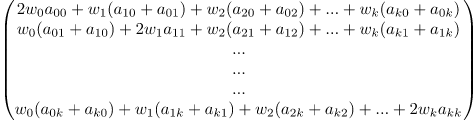

А теперь вынесем вектор $w$:
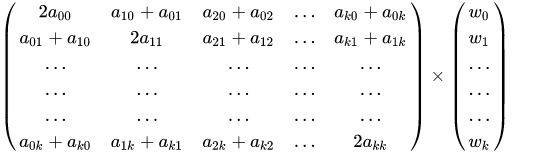

Что за матрицу мы получили? Это же $A + A^T$ !
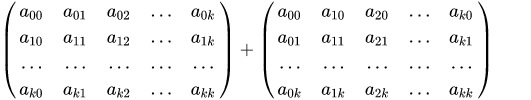

А учитывая то, что матрица A - симметричная, $A + A^T = 2A$

Вернемся к нашему выражению:

$w^TAw = 2Aw = 2X^TXw$

Вернемся в уравнение:

$nMSE' = \cfrac{d(w^TX^TXw - 2w^TX^Ty +y^Ty)}{dw} = 2X^TXw - 2X^Ty = 2X^T(Xw - y)$

$\nabla MSE = \cfrac{2}{n}\ X^T(Xw-y)$

Реализуем на питоне. Порядок действий:

1. Инициализируем класс, который на входе принимает learning rate, размер батча, количество эпох
2. Создаем в нем обычные методы: fit, predict, score; начальные веса задаем как нули
3. Внутри fit - реализуем цикл: режем датасет на батчи и проходимся по каждому батчу n раз, где n - количество эпох; на каждом этапе считаем градиент и двигаем w на антиградиент

In [31]:
import pandas as pd
import numpy as np

In [32]:
train_df = pd.read_csv('ML_data/train_data_n.csv')

In [33]:
test_df = pd.read_csv('ML_data/test_data_n.csv')

In [34]:
class SGDRegression:
    def __init__(self,learning_rate=.01, batch_size=100, epochs=5):
        self.lr = learning_rate
        self.b_size = batch_size
        self.epochs = epochs
    
    def gradient(self, x, y, w):
        return 2 / x.shape[0] * x.T @ (x @ w - y)
    
    
    def fit(self, features, target):
        X = np.concatenate((np.ones((features.shape[0],1)), features),axis=1)
        self.w = np.zeros(X.shape[1])
        y = target
        
        for _ in range(self.epochs):
            batch_num = int(X.shape[0] / self.b_size)
            
            for i in range(batch_num):
                X_batch = X[i*self.b_size:(i+1)*self.b_size,:]
                y_batch = y[i*self.b_size:(i+1)*self.b_size]
                
                self.w = self.w - self.gradient(X_batch, y_batch, self.w) * self.lr
    
    def predict(self, features):
        return features @ self.w[1:] + self.w[0]
    
    def score(self,answers, predictions):
        mse = ((answers - predictions)**2 / len(answers)).sum()
        mean_mse = ((answers - np.array([answers.mean()] * len(answers)))**2 / len(answers)).sum()
        return 1 - mse/mean_mse        

In [35]:
model = SGDRegression(.01,200,10)

In [36]:
features_train, target_train = train_df.drop('target', axis=1), train_df['target']

In [37]:
model.fit(features_train, target_train)

In [38]:
model.score(test_df['target'], model.predict(test_df.drop('target', axis=1)))

0.06065251309618169

Результаты так себе. А что с обучающими данными?

In [39]:
model.score(train_df['target'], model.predict(train_df.drop('target',axis=1)))

0.17646896039979565

Модель явно переобучена.

С этим мы разберемся позднее, а пока - переберем гиперпараметры модели:

In [40]:
from tqdm import tqdm, trange

In [41]:
lr =.01
batch_size = 10
epochs = 2
score = 0

features_test, target_test = test_df.drop('target', axis=1), test_df['target']

for alpha in np.arange(0.01,0.2,0.01):
    for size in trange(10,500,10):
        for epoch in range(2,10):
            model = SGDRegression(alpha, size, epoch)
            model.fit(features_train, target_train)
            if model.score(target_test, model.predict(features_test)) > score:
                lr = alpha
                batch_size = size
                epochs = epoch
                score =  model.score(target_test, model.predict(features_test))

100%|██████████| 49/49 [00:08<00:00,  5.63it/s]


In [42]:
lr, batch_size, epochs

(0.04, 480, 9)

In [43]:
model = SGDRegression(lr, batch_size, epochs)
model.fit(features_train, target_train)
model.score(target_train, model.predict(features_train)), model.score(target_test, model.predict(features_test)) 

(0.20576461951501313, 0.07069209167437285)

Прогресс не очень существенный - надо избавляться от переобучения

## Регуляризация

Решение задачи машинного обучения далеко не всегда единственное.

Например, если 2 признака в матрице признаков линейно зависимы - всегда можно подобрать такие веса, чтобы эти признаки (условно) взаимно "уничтожались" при их умножении на вектор весов и суммировании:

In [44]:
a = np.array([3,5,10])
b = a*2

In [45]:
b - a

array([ 3,  5, 10])

In [46]:
3*b - 5*a

array([ 3,  5, 10])

Таким образом мы можем получить решение, в котором веса могут быть неограниченно большими по модулю.

В реальности мы редко сталкиваемся с полностью __коллинеарными__ (линейно-зависимыми) векторами, однако даже приближенной коллинеарности достаточно, чтобы мы получали большие числа - и усложняли работу алгоритма.

Еще один важный нюанс: при такой ситуации веса в модели теряют всякий физический смысл: они могут быть отрицательными (поскольку, как уже упоминалось, "схлопывают друг друга").

Чтобы решить эту проблему, применяют __регуляризацию__: в исходную задачу поиска минимума добавляют __ограничение на значения вектора__ $w$. 

Как это сделать? Все достаточно просто: нам нужно измерить расстояние от вектора $w$ до нулевого вектора: чем оно меньше - тем меньше и значения коэффициентов.

Мы помним, что:

$Евклид = d_2= \sqrt{(x_1 - x_2)^2 + (y_1-y_2)^2 + ... (z_1-z_2)^2}$, где переменные - координаты векторов, между которыми мы считаем расстояние

$Манхэттен = d_1 = |x_1 - x_2|+ ... + |z_1 - z_2|$

Так как мы считаем расстояние до нулевого вектора - вычитать нам нечего, и евклидово расстояние будет равно:

$d_2 = \sqrt{w_1^2 + w_2^2 + ... + w_n^2}$

В регуляризации __корень не извлекается__, достаточно просто суммы квадратов (как в $MSE$)

А это есть не что иное, как скалярное произведение вектора самого на себя:

$<w,w>$

Чтобы дополнительно контролировать диапазон значений вектора $w$, скалярное произведение вектора умножают на __вес регуляризации__ - коэффициент $\lambda$

Соберем всё вместе:

$L(w) = MSE(Xw,y) + \lambda (w,w)$

Градиент же будет выглядить следующим образом:

$\nabla L(w) = \cfrac{2}{n}\ X^T(Xw-y) + 2\lambda w$ - производная квадрата переменной равна переменной, умноженной на 2

__Интуитивно__ регуляризация используется для некоторого искажения матрицы: мы везде прибавляем некие значения. Да, с точки зрения аналитического решения мы искажаем результаты, но не очень сильно; при этом качество обучения за счет такого сдвига возрастает, как и скорость работы алгоритма

Реализуем на питоне. 

__Не забываем__: при регуляризации коэффициент для свободного члена (который мы прибавляем к матрице признаков столбцом из единичек) равен нулю: 

In [47]:
class SGDRRegression:
    def __init__(self,learning_rate=.01, batch_size=100, epochs=10, reg_weight=1):
        self.lr = learning_rate
        self.b_size = batch_size
        self.epochs = epochs
        self.rw = reg_weight
    
    def gradient(self, x, y, w):
        reg = 2 * w.copy()
        reg[0] = 0
        return 2 / x.shape[0] * x.T @ (x @ w - y) + reg * self.rw
    
    
    def fit(self, features, target):
        X = np.concatenate((np.ones((features.shape[0],1)), features),axis=1)
        self.w = np.zeros(X.shape[1])
        y = target
        
        for _ in range(self.epochs):
            batch_num = int(X.shape[0] / self.b_size)
            
            for i in range(batch_num):
                X_batch = X[i*self.b_size:(i+1)*self.b_size,:]
                y_batch = y[i*self.b_size:(i+1)*self.b_size]
                
                self.w = self.w - self.gradient(X_batch, y_batch, self.w) * self.lr
    
    def predict(self, features):
        return features @ self.w[1:] + self.w[0]
    
    def score(self,answers, predictions):
        mse = ((answers - predictions)**2 / len(answers)).sum()
        mean_mse = ((answers - np.array([answers.mean()] * len(answers)))**2 / len(answers)).sum()
        return 1 - mse/mean_mse        

In [48]:
reg_model = SGDRRegression()
reg_model.fit(features_train, target_train)
reg_model.score(target_test, reg_model.predict(features_test)),\
reg_model.score(target_train, reg_model.predict(features_train))


(0.08061382017133167, 0.16660956844692543)

In [49]:
model.score(target_test, model.predict(features_test)),model.score(target_train, model.predict(features_train))

(0.07069209167437285, 0.20576461951501313)

Результат уже лучше, чем у модели, у которой подобраны параметры. Попробуем перебор:

In [50]:
lr =.01
batch_size = 10
epochs = 2
reg_weight = 0.1
score = 0

features_test, target_test = test_df.drop('target', axis=1), test_df['target']
for size in trange(50,510,50):
    for alpha in np.arange(0.01,0.15,0.01):
        for epoch in range(2,10):
            for rw in np.arange(.1,2,.1):
                model = SGDRRegression(alpha, size, epoch, rw)
                model.fit(features_train, target_train)
                if model.score(target_test, model.predict(features_test)) > score:
                    lr = alpha
                    batch_size = size
                    epochs = epoch
                    reg_weight = rw
                    score =  model.score(target_test, model.predict(features_test))

100%|██████████| 10/10 [06:22<00:00, 38.27s/it]


In [51]:
batch_size, epochs, reg_weight, lr, score

(500, 9, 0.6, 0.09, 0.0856339139226523)

Регуляризация позволила выиграть еще 5 тысячных в $R^2$

## SGD для нейросетей

С помощью __SGD__ обучается не только линейная регрессия - но и нейросети.

По сути __нейросеть__ - это комплекс простых моделей, которые принимают на вход значения признаков, умножают их на вектор весов, после чего передают на выход:

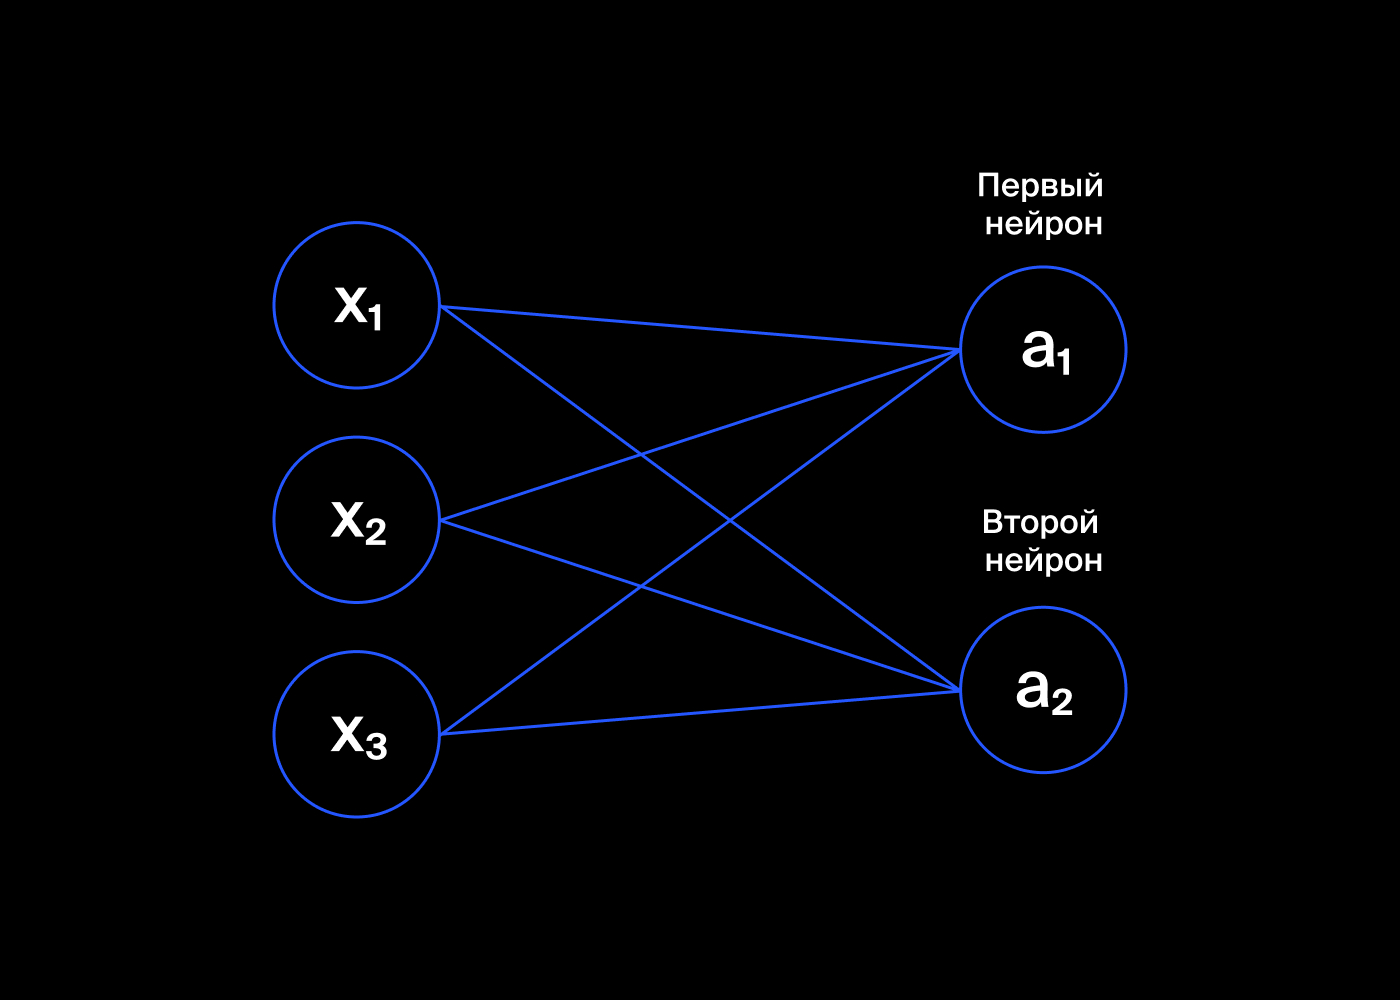

Здесь мы видим сеть с 3 входами и 2 выходами.

Значения a_1 и a_2 вычисляются как сумма произведений вектора признаков на входе и вектора весов у выходов (__вектора весов у каждого выхода свои__):

$a_1 = xw_1$, $a_2 = xw_2$

На выходе мы получаем числа.

В более сложной нейросети возможны любые другие преобразования:

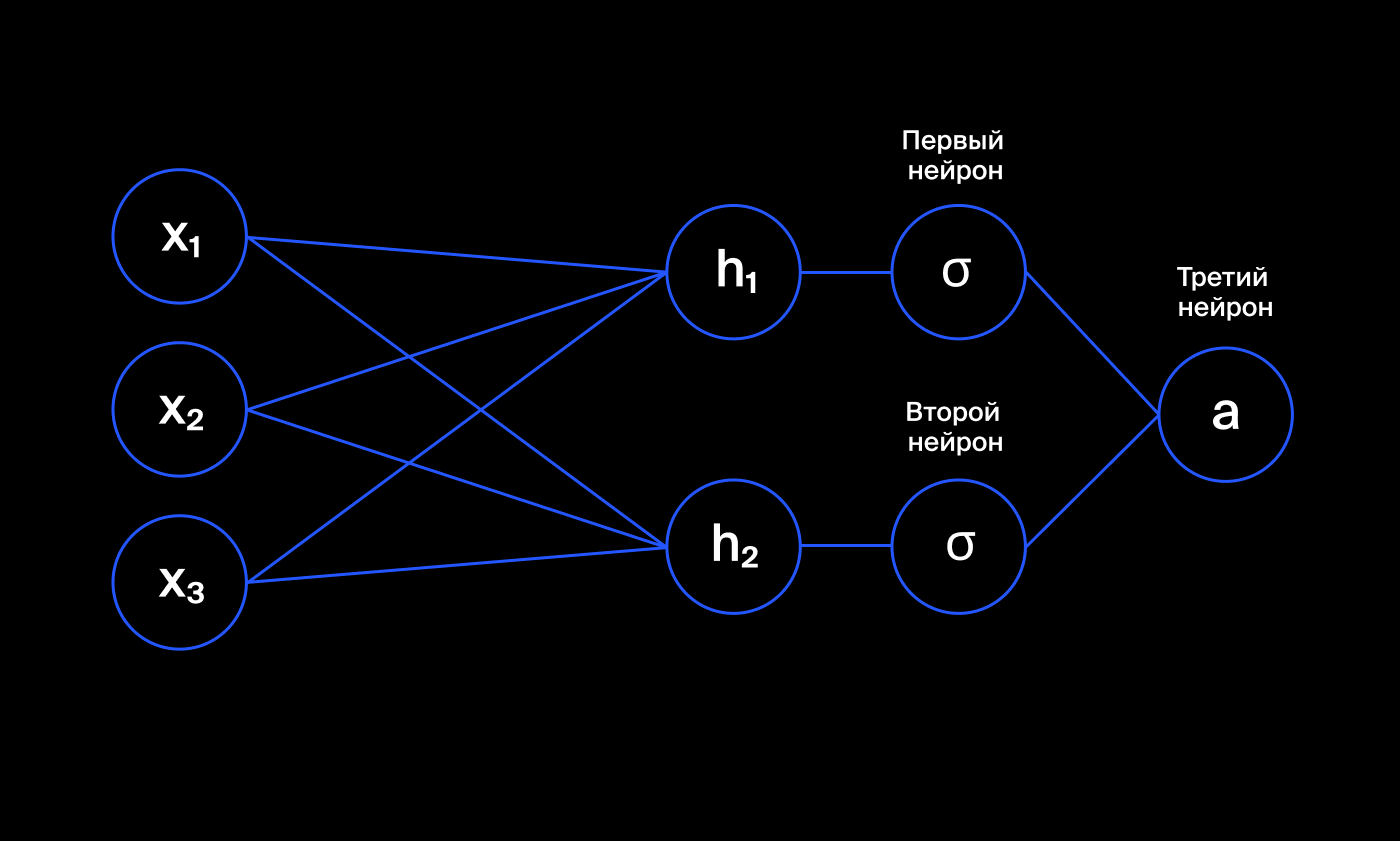

Например, на картинке выше, $h_1\ и\ h_2$ получаются так же, как и предсказания у предыдущей сети:

$h_1 = xw_1,\ h_2=xw_2$


Но вот далее, чтобы получить итоговое предсказание, мы вектор $h$ передаем в знакомую нам __функцию - сигмоиду__, после чего умножаем на вектор весов $w_3$, суммируем и получаем значение на выходе:

$a = \sigma(h)w_3$

$\sigma = \cfrac{1}{1 + e^{-x}}$

Переписав вектор $h$ как произведение вектора $x$ и матрицы $W$, где каждый столбец - это вес каждого нейрона (столбец $w_1, w_2$ и т.д.) мы получим:

$a = \sigma(xW)w_3$

Здесь мы засовываем в функцию вектор, после чего получившийся вектор умножаем на число - и получаем число

Функции в нейронных сетях называются __функциями активации__

### Задача обучения нейросети

Чтобы нейросеть обучить - нужно обозначить задачу обучения.

Любую нейросеть можно обозначить функцией от её входного вектора и параметров.

Нейросеть обозначается как $N(X,P)$, где:
- X - матрица признаков;
- P - параметры сети - её веса на каждом "слое" нейронов.

Опишем такую сеть:

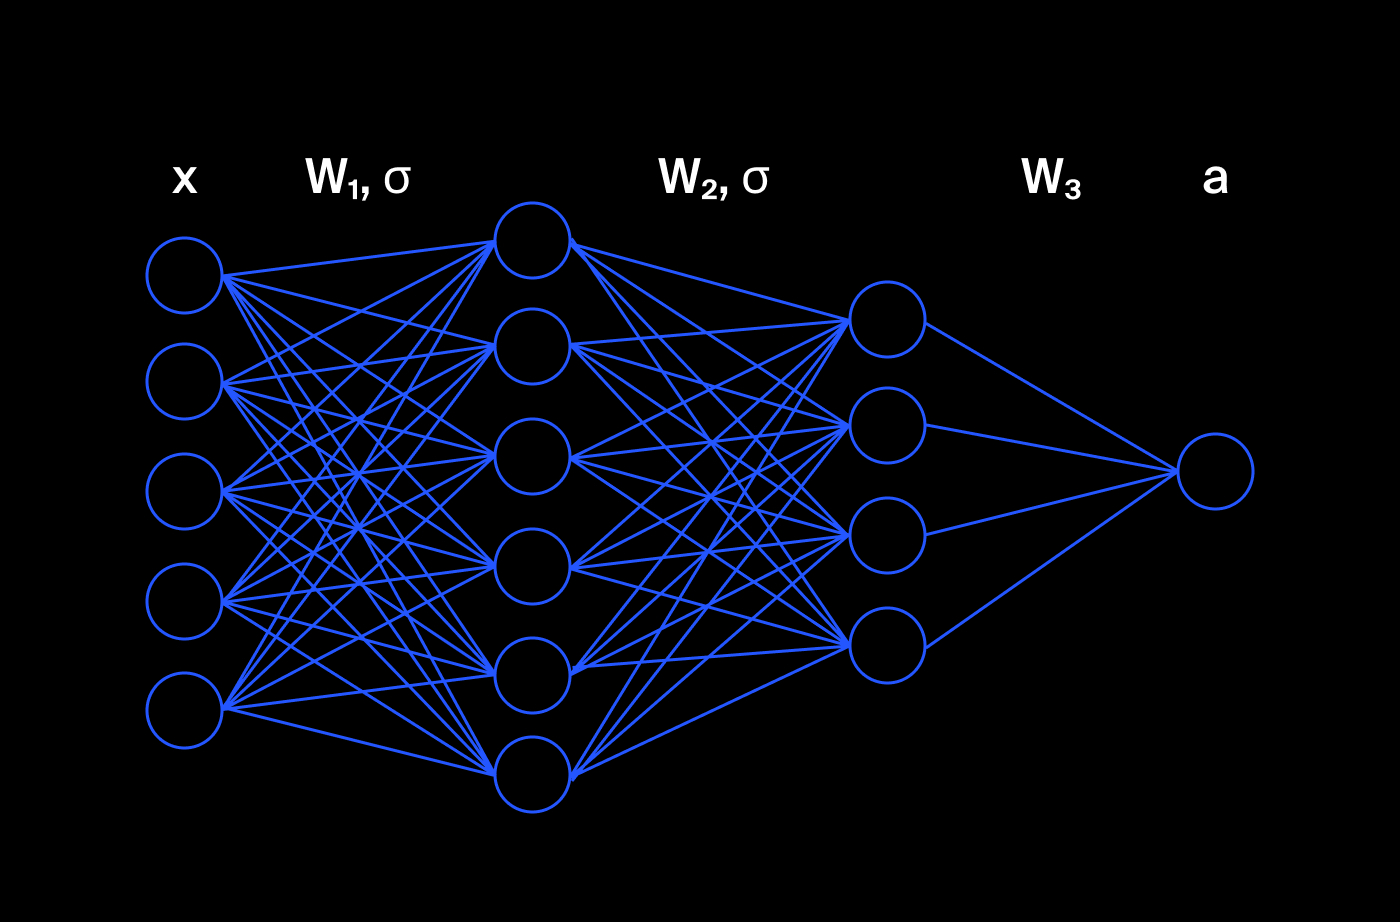

Её описание будет выглядеть как:

$N(X,P) = \sigma(\sigma(XW_1)W_2)W_3$

$a, \hat{y}$ - предсказания;

$y$ - правильные ответы;

$L$ - функция потерь.

Задача обучения:

$min\ L(N(X,P), y)$

И минимум этой функции также находится алгоритмом __SGD__.

То есть мы находим градиент нейросети - и уже с помощью него обучаем алгоритм

# Ансамбли и бустинг

Если одна модель ошибается - можно построить несколько, и получать решение от них.

Такой подход и называется __ансамблем__.

У ансамблей несколько основных разновидностей:
1. __Бустинг__ - объединение нескольких моделей в цепочку, в которой каждая следующая модель будет нивелировать ошибки предыдущих; модели обучаются последовательно.
2. __Бэггинг__ - __bagging, bootstrap aggregating__ - обучение k базовых/слабых моделей с помощью бутстрап выборок: выбираем случайным образом с возвращением из выборки размера $n\ l\ элементов\ k\ раз$; на каждой выборке обучаем модели; усредняем результаты моделей. Так работает, например, случайный лес, объединяя деревья решений.


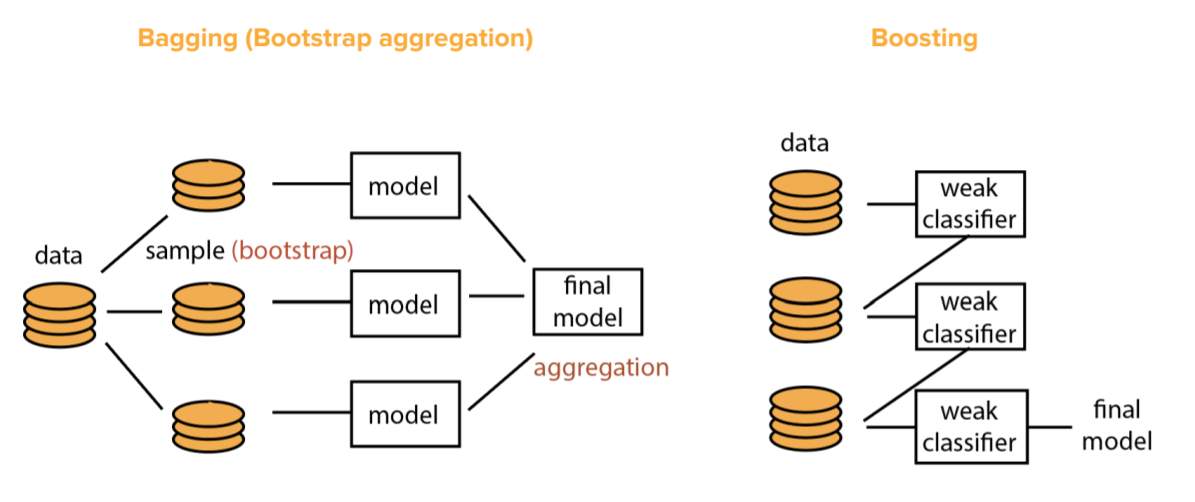

В ходе обучения случайного леса каждый базовый алгоритм строится независимо от остальных. Бустинг, в свою очередь, воплощает идею последовательного построения линейной комбинации алгоритмов. Каждый следующий алгоритм старается уменьшить ошибку текущего ансамбля, то есть уменьшить общую ошибку всех своих предшественников. Как следствие, итоговая композиция будет иметь меньшее смещение, чем каждый отдельный базовый алгоритм.

Градиентный бустинг, использующий в качестве базовых модели деревьев решений называются __Gradient Boosting Decision Trees, GBDT__. Это решение - одно из самых популярных для табличных данных и аналитических задач

Для примера рассмотрим задачу с квадратичной функцией потерь:

$L(y,a) = \cfrac{1}{n}\ \sum_{i=1}^n(y_i - a_i)^2$

Для решения мы построим композицию из k базовых алгоритмов:

$a(x) = b_1(x) +b_2(x) + ... + b_k(x)$, где $b_i$ - некий алгоритм(функция), которая дает предсказания по матрице признаков

Если мы обучим единственное решающее дерево, то качество такой модели, скорее всего, будет низким. Однако о построенном дереве мы знаем, на каких объектах оно давало точные предсказания, а на каких ошибалось.

Попробуем использовать эту информацию и обучим еще одну модель. 

Допустим, что предсказание первой модели на объекте $x_l$ на 10 больше, чем необходимо __(т.е. $b_1(x_l)=y_l+10$).__ Если бы мы могли обучить новую модель, которая на $x_l$ будет выдавать ответ −10, то сумма ответов этих двух моделей на объекте $x_l$ в точности совпала бы с истинным значением:

$a(x_l) = b_1(x_l) + b_2(x_l) = y_l + 10 + (-10) = y_l$

Другими словами, если вторая модель научится предсказывать разницу между реальным значением и ответом первой, то это позволит уменьшить ошибку композиции.

В реальности вторая модель тоже не сможет обучиться идеально, поэтому обучим третью, которая будет «компенсировать» неточности первых двух. Будем продолжать так, пока не построим композицию из K алгоритмов.

Итоговая модель - ансамбль моделей - будет выглядеть так:

$a_N(x) = \sum_{k=1}^Nb_k(x)\gamma_k$, где
- $\gamma_k$ - вес k-ой модели (предсказания каждой модели мы будем дополнительно умножать);


Рассмотрим пошагово. Для простоты, чтобы избавиться от лишних множителей в виде весов, приравняем их все к единице.

Если брать 1 алгоритм, ансамбль будет выглядеть следующим образом:

$a_1(x) = b_1(x)$

Задача машинного обучения сведется к:

$b_1 = argmin\ \cfrac{1}{n}\ \sum_{i=1}^n(b(x_i) - y_i)^2$

Запишем остаток разности между правильными ответами и предсказаниями:

$e_{1i} = y_i - b_1(x_i)$

Теперь введем второй алгоритм. Задача машинного обучения теперь сведется к:

$b_2 = argmin\ \cfrac{1}{n}\ \sum_{i=1}^n(b(x_i) - e_{1i})^2$

То есть теперь нам нужно минимизировать не разницу между предсказаниями и правильными ответами, а разницу между предсказаниями и остатками.

Более понятно становится, если подставить в формулу значение $e_{1i}$:

$b_2 = argmin\ \cfrac{1}{n}\ \sum_{i=1}^n(b(x_i) - y_i + b_1(x_i))^2$

То есть мы ищем алгоритм, который бы минимизировал разницу между суммой предсказаний первого и второго алгоритмов и правильными ответами.

Теперь наш ансамбль выглядит как:

$a_2(x) = \sum_{k=1}^2b_k(x) = b_1(x) + b_2(x)$

Соответственно, остаток теперь выглядит как:

$e_{2i} = y_i - \sum_{k=1}^2b_k(x)$

На каждом шаге мы продолжаем минимизировать разницу между предсказаниями модели и остатком. Алгоритм на шаге N выглядит как:

$b_N(x) = argmin\ \cfrac{1}{n}\ \sum_{i=1}^n(b(x_i) - e_{N-1\ i})^2$

__После первого этапа__ мы заставляем наши новые алгоритмы __прогнозировать ошибку, а не целевое значение__.

## Градиентный бустинг

Градиентный бустинг берет самое лучшее от бустинга и градиентного спуска:
1. У нас, так же, __как и в бустинге__, есть цепочка слабых алгоритмов предсказания, которые улучшают предсказания предыдущего шага, минимизируя ошибку.
2. Мы так же, как и в __градиентном спуске__, будем искать минимум функции потерь, но градиент мы будем брать __не по весам, а по предсказаниям__!

__Важно__:

В случае $MSE$ для простоты извлечения градиента договорились рассчитывать не полную $MSE$, а $\cfrac{1}{2}MSE$, поскольку таким образом мы устраняем двойку в числителе градиента.

И действительно, мы можем это сделать: мы понимаем, что если у одних предсказаний $MSE = 10$, а у других $MSE = 20$ - если мы разделим оба предсказания пополам, мы всё еще понимаем, что первое предсказание - точнее.

__Начальное значение__ для градиентного бустинга ($предсказание_0$) - является неким константным предсказанием.

При этом оно всё еще подчиняется $b = argmin\ \sum_{i=1}^nL(y,\hat{y})\ или\ b = argmin\ \cfrac{1}{n}\ \sum_{i=1}^n(y-\hat{y})^2$ для MSE.

Наша ошибка - __half-MSE__: $\cfrac{1}{2n} \sum_{i=1}^n(y-\hat{y})^2$

Для наглядности - сгенерируем числа для регрессии с помощью __sklearn.datasets.make_regression__:

In [52]:
from sklearn.datasets import make_regression
datum = make_regression(10,3)

In [53]:
datum

(array([[-0.97204128, -1.10229254, -1.24625911],
        [-0.66745556, -0.36296764, -0.54320064],
        [-1.22512456,  0.4856654 , -0.10466636],
        [ 1.23276525, -0.31822112,  1.17562936],
        [ 0.41602897,  0.02667072,  0.60736947],
        [-2.01602619,  0.2637636 ,  0.61400712],
        [-0.09036749, -0.08907075, -1.1834527 ],
        [ 2.065626  ,  0.51856568, -0.10173108],
        [ 0.45389569,  0.20520924, -0.62584234],
        [ 0.637857  ,  1.78102067,  0.09839138]]),
 array([-37.33560997, -20.88321781, -24.46534546,  28.13219753,
         11.27412644, -44.8329877 ,  -4.98953907,  55.30102642,
         12.19960772,  34.8337423 ]))

In [54]:
new_df = pd.DataFrame(datum[0])

In [55]:
new_df['y_true'] = datum[1]

In [56]:
new_df

,0,1,2,y_true
0,-0.972041,-1.102293,-1.246259,-37.335610
1,-0.667456,-0.362968,-0.543201,-20.883218
2,-1.225125,0.485665,-0.104666,-24.465345
3,1.232765,-0.318221,1.175629,28.132198
4,0.416029,0.026671,0.607369,11.274126
5,-2.016026,0.263764,0.614007,-44.832988
6,-0.090367,-0.089071,-1.183453,-4.989539
7,2.065626,0.518566,-0.101731,55.301026
8,0.453896,0.205209,-0.625842,12.199608
9,0.637857,1.781021,0.098391,34.833742


Готово. Вернемся к теории.

Для того, чтобы найти минимум функции потерь, имея лишь истинные значения, нам нужно взять от функции потерь производную по предсказаниям ($\hat{y}$) и приравнять её к нулю:

$\cfrac{\delta\ half-MSE}{\delta \hat{y}} = \cfrac{1}{n}\ \sum_{i=1}^n(y_i-\hat{y_i})(-1)$ - это градиент функции $half-MSE$

При этом для каждого отдельного значения суммирование, как и деление на n уйдет, и всё, что останется - это:

$(-1)(y-\hat{y})$

Приравняем градиент к нулю:

$\cfrac{1}{n}\ \sum_{i=1}^n\ (\hat{y_i} - y_i) = 0$

$\cfrac{1}{n}$ мы отбрасываем - оно сокращается с нулём.

Теперь всё что нам нужно - это решить уравнение. Для нашего примера будет сумма из 10 пар разностей $\hat{y_i}$ и фактических значений признака. Так как нулевое предсказание - это константа, то в итоге мы просто получим 10 пар разностей $\hat{y}$ и фактических значений признака - или сумму фактических значений минус $10 \times \hat{y}$:

$y_1 + y_2 + ... + y_{10} - 10 \hat{y} = 0$

$\hat{y} = \cfrac{y_1 + y_2 + ... y_{10}}{10}$

Таким образом мы приходим к тому, что __нулевое предсказание / константное предсказание__, которое минимизирует функцию потерь - это среднее арифметическое от настоящих значений целевого признака.

Построим такой столбец для нашего примера:

In [57]:
new_df['y_pred_0'] = new_df.y_true.mean()

In [58]:
new_df

,0,1,2,y_true,y_pred_0
0,-0.972041,-1.102293,-1.246259,-37.335610,0.9234
1,-0.667456,-0.362968,-0.543201,-20.883218,0.9234
2,-1.225125,0.485665,-0.104666,-24.465345,0.9234
3,1.232765,-0.318221,1.175629,28.132198,0.9234
4,0.416029,0.026671,0.607369,11.274126,0.9234
5,-2.016026,0.263764,0.614007,-44.832988,0.9234
6,-0.090367,-0.089071,-1.183453,-4.989539,0.9234
7,2.065626,0.518566,-0.101731,55.301026,0.9234
8,0.453896,0.205209,-0.625842,12.199608,0.9234
9,0.637857,1.781021,0.098391,34.833742,0.9234


Посчитаем __residual - остаток__ разности правильных ответов и предсказаний.

Кстати, наш __градиент__ - не что иное, как __residual__, но со знаком минус!

In [59]:
new_df['r_0'] = new_df.y_true - new_df.y_pred_0
new_df

,0,1,2,y_true,y_pred_0,r_0
0,-0.972041,-1.102293,-1.246259,-37.335610,0.9234,-38.259010
1,-0.667456,-0.362968,-0.543201,-20.883218,0.9234,-21.806618
2,-1.225125,0.485665,-0.104666,-24.465345,0.9234,-25.388745
3,1.232765,-0.318221,1.175629,28.132198,0.9234,27.208797
4,0.416029,0.026671,0.607369,11.274126,0.9234,10.350726
5,-2.016026,0.263764,0.614007,-44.832988,0.9234,-45.756388
6,-0.090367,-0.089071,-1.183453,-4.989539,0.9234,-5.912939
7,2.065626,0.518566,-0.101731,55.301026,0.9234,54.377626
8,0.453896,0.205209,-0.625842,12.199608,0.9234,11.276208
9,0.637857,1.781021,0.098391,34.833742,0.9234,33.910342


Теперь попросим базовый алгоритм предсказывать наши остатки:

In [60]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=2)
model.fit(new_df[[0,1,2]],new_df['r_0'])
new_df['r_0_pred'] = model.predict(new_df[[0,1,2]])

In [61]:
new_df

,0,1,2,y_true,y_pred_0,r_0,r_0_pred
0,-0.972041,-1.102293,-1.246259,-37.335610,0.9234,-38.259010,-36.468048
1,-0.667456,-0.362968,-0.543201,-20.883218,0.9234,-21.806618,-13.859778
2,-1.225125,0.485665,-0.104666,-24.465345,0.9234,-25.388745,-36.468048
3,1.232765,-0.318221,1.175629,28.132198,0.9234,27.208797,16.278577
4,0.416029,0.026671,0.607369,11.274126,0.9234,10.350726,16.278577
5,-2.016026,0.263764,0.614007,-44.832988,0.9234,-45.756388,-36.468048
6,-0.090367,-0.089071,-1.183453,-4.989539,0.9234,-5.912939,-13.859778
7,2.065626,0.518566,-0.101731,55.301026,0.9234,54.377626,44.143984
8,0.453896,0.205209,-0.625842,12.199608,0.9234,11.276208,16.278577
9,0.637857,1.781021,0.098391,34.833742,0.9234,33.910342,44.143984


А теперь - вычтем из предсказанных ранее значений целевого признака градиент по предсказаниям (в нашем случае - __прибавим residuals__, ведь у нас перед градиентом стоит знак минус):

In [62]:
new_df['y_pred_1'] = new_df['y_pred_0'] + new_df['r_0_pred']
new_df

,0,1,2,y_true,y_pred_0,r_0,r_0_pred,y_pred_1
0,-0.972041,-1.102293,-1.246259,-37.335610,0.9234,-38.259010,-36.468048,-35.544648
1,-0.667456,-0.362968,-0.543201,-20.883218,0.9234,-21.806618,-13.859778,-12.936378
2,-1.225125,0.485665,-0.104666,-24.465345,0.9234,-25.388745,-36.468048,-35.544648
3,1.232765,-0.318221,1.175629,28.132198,0.9234,27.208797,16.278577,17.201977
4,0.416029,0.026671,0.607369,11.274126,0.9234,10.350726,16.278577,17.201977
5,-2.016026,0.263764,0.614007,-44.832988,0.9234,-45.756388,-36.468048,-35.544648
6,-0.090367,-0.089071,-1.183453,-4.989539,0.9234,-5.912939,-13.859778,-12.936378
7,2.065626,0.518566,-0.101731,55.301026,0.9234,54.377626,44.143984,45.067384
8,0.453896,0.205209,-0.625842,12.199608,0.9234,11.276208,16.278577,17.201977
9,0.637857,1.781021,0.098391,34.833742,0.9234,33.910342,44.143984,45.067384


Давайте посмотрим, уменьшилась ли наша ошибка в сравнении с константным предсказанием:

In [63]:
from sklearn.metrics import mean_squared_error
mean_squared_error(new_df['y_true'], new_df['y_pred_0']), mean_squared_error(new_df['y_true'], new_df['y_pred_1'])

(979.3925315728472, 72.7623947031358)

Как мы видим - ошибка действительно уменьшилась, причем в разы

Скрипт работы алгоритма будет следующим:
1. Выбрать начальное значение предсказаний;
2. Вычислить остаток - __residual__ - разницу между истинными и предсказанными значениями признака;
3. С помощью базового алгоритма научиться предсказывать __residuals__ (по сути - антиградиент);
4. Вычесть из текущего предсказания градиент (в котором будут уже __не фактические residuals, а предсказанные__), умноженный на некую $\gamma$ - __learning rate__ и получить новые предсказания целевого признака
5. Повторить действия со 2 шага.

Аналогично с градиентным спуском:
1. Выбрали начальные значения: у градиентного спуска это начальные значения весов, у градиентного бустинга - константное значение предсказаний.
2. Вычислили градиент функции потерь: по вектору весов у спуска и по предсказаниям - у бустинга (и там, и там на выходе - вектора)
3. Вычли градиент, умноженный на __learning rate__: у спуска - из вектора весов, у бустинга - из вектора предсказаний.

Вся разница в том, что в градиентном бустинге мы в градиент каждый раз будем вкладывать __остатки, которые предсказал алгоритм__ - то есть наш градиент является предсказанным значением

Попробуем реализовать на 100 операций с __learning_rate=.1__

In [64]:
datum = make_regression(100,3)

In [65]:
df_gb = pd.DataFrame(datum[0])
df_gb['y_true'] = datum[1]
df_gb

,0,1,2,y_true
0,-0.297505,0.063720,0.033763,-2.668803
1,-2.004581,-0.372757,0.583765,-68.246932
2,-1.634085,-1.686027,0.897836,-144.087052
3,0.541472,0.594957,-1.169552,41.819774
4,0.245023,-1.838022,0.338662,-113.781730
...,...,...,...,...
95,0.071434,0.561827,-0.442023,35.106459
96,-0.279479,0.635326,0.414660,39.671399
97,0.324676,0.584664,-2.259667,25.402076
98,-0.268873,-1.461679,0.442474,-100.136540


In [66]:
df_gb['y_pred'] = df_gb.y_true.mean()
learning_rate = .1
model_list = []

for i in range(501):
    model = DecisionTreeRegressor(max_depth=2)
    model.fit(df_gb[[0,1,2]], df_gb.y_true - df_gb.y_pred)
    df_gb.y_pred += learning_rate * model.predict(df_gb[[0,1,2]])
    model_list.append(model)
    if i % 20 == 0:
        print(mean_squared_error(df_gb.y_true, df_gb.y_pred))
df_gb

4035.739043451913
335.07764148237175
82.78114945670029
33.70703223291746
19.442803244570946
12.793704785247833
9.813556277064828
7.954582871568321
6.480949638205884
5.493028800299554
4.3964295365715
3.819471112198961
3.3547091347473783
2.859294791716697
2.332506601919976
1.9292662940148992
1.536111034358202
1.2558491689652258
0.9627822387930399
0.8222176141668578
0.686828744698073
0.5996051477627808
0.5216209123966621
0.4509771843496251
0.3860122251985754
0.31848045933979663


,0,1,2,y_true,y_pred
0,-0.297505,0.063720,0.033763,-2.668803,-3.994957
1,-2.004581,-0.372757,0.583765,-68.246932,-68.982991
2,-1.634085,-1.686027,0.897836,-144.087052,-144.251588
3,0.541472,0.594957,-1.169552,41.819774,41.085508
4,0.245023,-1.838022,0.338662,-113.781730,-113.632043
...,...,...,...,...,...
95,0.071434,0.561827,-0.442023,35.106459,34.111426
96,-0.279479,0.635326,0.414660,39.671399,39.607466
97,0.324676,0.584664,-2.259667,25.402076,25.132865
98,-0.268873,-1.461679,0.442474,-100.136540,-99.492956


Мы видим, как с каждым шагом ошибка уменьшается - работает!

## Регуляризация градиентного бустинга

Как и любые другие модели, __градиентный бустинг__ имеет возможность __переобучиться__ - а значит, на новых данных работать очень плохо.

Если в случае градиентного спуска мы задавали ограничения на размер коэффициентов, то в случае с градиентным бустингом есть несколько вариантов решений:
1. Скорость обучения - __learning_rate__. Чем она ниже - тем ниже вероятность переобучения
2. Гиперпараметры базовых алгоритмов: в случае дерева - глубина. Чем ниже дерево, тем ниже шансы переобучения.
3. Рандомизация подвыборок - __стохастический градиентный бустинг__.

## CatBoost

__CatBoost__ - библиотека разработки Яндекса для градиентного бустинга; заявляется Яндексом как самое быстрое и точное решение в сравнении с конкурентами (__XGBoost и LightGBM__)

Основные модели - это __CatBoostClassifier и CatBoostRegressor__

### CatBoostClassifier

Работает аналогично с классификатором из библиотеки __sklearn__. Параметры:
- max_depth - глубина дерева
- loss_function - функция потерь, поддерживает множество разных; по умолчанию - Logloss;
- iterations - кол-во итераций;
- learning_rate - скорость обучения;
- cat_features - список категориальных признаков (модель сама их закодирует)

Попробуем на задаче со страховыми выплатами:

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
import numpy as np


data = pd.read_csv('ML_data/travel_insurance.csv')

features_train, features_valid, target_train, target_valid = train_test_split(data.drop('Claim', axis=1), 
                                                                              data.Claim, 
                                                                              test_size=0.25, random_state=12345)

cat_features = ['Agency', 'Agency Type', 'Distribution Channel',
                'Product Name', 'Destination', 'Gender']

score = 0
best_depth = 0
best_lr = 0
best_iter = 0
for i in trange(30, 51):
    for depth in range(2,7):
        for alpha in np.arange(.05,0.51, 0.05):
            model = CatBoostClassifier(iterations = i, max_depth=depth, learning_rate = alpha)
            model.fit(features_train, target_train, cat_features=cat_features, verbose=0)
            
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]

            m_score = roc_auc_score(target_valid, probabilities_one_valid)
            if m_score > score:
                best_depth = depth
                best_iter = i
                best_lr = alpha
                score = m_score
                print(f'Depth: {depth}, learning rate:{alpha}, iterations: {i}, score:{score}')
print(score, best_lr, best_iter, best_depth)

  0%|          | 0/21 [00:00<?, ?it/s]

Depth: 2, learning rate:0.05, iterations: 30, score:0.7603609486396593
Depth: 2, learning rate:0.1, iterations: 30, score:0.8019588753608256
Depth: 2, learning rate:0.2, iterations: 30, score:0.8109896942169423
Depth: 2, learning rate:0.25, iterations: 30, score:0.8180778795960268
Depth: 2, learning rate:0.3, iterations: 30, score:0.8204450276159377
Depth: 2, learning rate:0.4, iterations: 30, score:0.8242372470433141
Depth: 2, learning rate:0.5, iterations: 30, score:0.8244321022964035
Depth: 3, learning rate:0.35000000000000003, iterations: 30, score:0.8303165888824069
Depth: 3, learning rate:0.4, iterations: 30, score:0.8303227446984218


  5%|▍         | 1/21 [00:53<17:52, 53.64s/it]

Depth: 5, learning rate:0.45, iterations: 31, score:0.83040134973369


 10%|▉         | 2/21 [01:47<17:03, 53.85s/it]

Depth: 3, learning rate:0.35000000000000003, iterations: 32, score:0.8310204827675034
Depth: 4, learning rate:0.45, iterations: 32, score:0.8350466232034488


 14%|█▍        | 3/21 [02:42<16:18, 54.34s/it]

Depth: 4, learning rate:0.45, iterations: 33, score:0.8352587620938108


 33%|███▎      | 7/21 [04:36<07:34, 32.44s/it]

Depth: 4, learning rate:0.45, iterations: 37, score:0.8352767560175469


100%|██████████| 21/21 [13:35<00:00, 38.82s/it]

0.8352767560175469 0.45 37 4


## LightGBM

__LightGBM__ - еще одна библиотека для градиентного бустинга.

In [68]:
import lightgbm as lgb
import numpy as np
import pandas as pd

Мы будем использовать доступные в sklearn три набора данных (показаны ниже):

- Boston Housing Dataset — это выборка для задач регрессии, которая содержит информацию о различных характеристиках домов в Бостоне и их цене в долларах. Она будет использоваться нами при решении регрессионных проблем.
- Breast Cancer Dataset — это датасет для задач классификации, содержащий информацию о двух типах опухолей. Он будет применяться для объяснения методов бинарной классификации.
- Wine Dataset — это набор данных классификации, содержащий информацию об ингредиентах, используемых в создании вин трех типов. Используется нами для объяснения задач мультиклассификации.

### Регрессия в LightGBM

In [69]:
from sklearn.datasets import load_boston

In [70]:
boston = load_boston()

for line in boston.DESCR.split("\n"):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\ezio1\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [71]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_target = boston.target

In [72]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [73]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Итак, присупим к созданию модели. Самый простой способ - это призвать метод __train()__ и передать в него параметры:

- __params__ — это словарь, определяющий параметры алгоритма деревьев решений с градиентным бустингом. Нам просто нужно предоставить целевую функцию для начала работы в зависимости от типа задачи (классификация/регрессия). Позже мы ознакомимся с часто используемым списком параметров, которые можно передать в этот словарь.
- __train_set__ — этот параметр принимает объект типа Dataset фреймворка lightgbm, который содержит информацию о показателях и целевых значениях. Это внутренняя структура данных, разработанная lightgbm для обертывания данных.
- __num_boost_round__ — указывает количество деревьев бустинга, которые будут использоваться в ансамбле. Ансамбль — это группа деревьев с градиентным бустингом, которую мы обычно называем оценщиком. Значение по умолчанию равно 100.
- __valid_sets__ — принимает список Dataset объектов, которые являются выборками для валидации. Эти проверочные датасеты оцениваются после каждого цикла обучения.
- __valid_names__ — принимает список строк той же длины, что и у valid_sets, определяющих имена для каждой проверочной выборки. Эти имена будут использоваться при выводе оценочных метрик для валидационных наборов данных, а также при их построении.
- __categorical_feature__ — принимает список строк/целых чисел или строку auto. Если мы передадим список строк/целых чисел, тогда указанные столбцы из набора данных будут рассматриваться как категориальные.
- __verbose_eval__ — принимает значения типа bool или int. Если мы установим значение False или 0, то train не будет выводить результаты расчета метрик на проверочных выборках, которые мы передали. Если нами было указано True, он будет печатать их для каждого раунда. При передаче целого числа, большего 1, train отобразит результаты повторно после указанного количества раундов.

В отличие от других библиотек, __LightGBM__ "ест" не просто датафреймы, а объекты типа __dataset__.

__Dataset__ представляет собой внутреннюю структуру данных lightgbm для хранения данных и меток. Ниже приведены важные параметры класса.

- __data__ — принимает массив библиотеки numpy, dataframe pandas, разреженные матрицы (sparse matrix) scipy, список массивов numpy, фрейм таблицы данных h2o в качестве входного значения, хранящего значения признаков (features).
- __label__ — принимает массив numpy, pandas series или dataframe с одним столбцом. Данный параметр определяет целевые значения. Мы также можем установить для label значение None, если у нас нет таких значений. По умолчанию — None.
- __feature_name__ — принимает список строк, определяющих имена показателей.
- __categorical_feature__ — имеет то же значение, что и указанное выше в параметре метода train(). Мы можем определить категориальный показатель здесь или в train.

Разделим выборку на обучающую и тестовую и скормим всё методу __Dataset__:

In [74]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(boston_df, boston_target, random_state=1, test_size=.3)



In [75]:
train_data = lgb.Dataset(features_train, target_train, feature_name = boston.feature_names.tolist())
test_data =  lgb.Dataset(features_test, target_test, feature_name = boston.feature_names.tolist())

In [76]:
booster = lgb.train({'objective':'regression', 'verbosity':-1}, train_set=train_data, valid_sets=(test_data,), verbose_eval=5, num_boost_round=50)

[5]	valid_0's l2: 44.7462
[10]	valid_0's l2: 26.6406
[15]	valid_0's l2: 19.094
[20]	valid_0's l2: 15.0057
[25]	valid_0's l2: 12.8416
[30]	valid_0's l2: 11.4177
[35]	valid_0's l2: 10.7182
[40]	valid_0's l2: 10.1425
[45]	valid_0's l2: 9.67895
[50]	valid_0's l2: 9.57234


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


По умолчанию LIghtGBM для регрессии минимизирует L2 - то есть в score уже заложена регуляризация

Посмотрим на R2. Предсказания осуществляются методом __predict()__

In [77]:
from sklearn.metrics import r2_score
r2_score(target_train, booster.predict(features_train))

0.9409301912475232

In [78]:
r2_score(target_test, booster.predict(features_test))

0.8955606273324729

Также у __predict()__ есть дополнительные параметры:
- __raw_score__ — это логический параметр, при котором, если он установлен в True, результатом выполнения будут необработанные прогнозы. Для задач регрессии это не имеет никакого значения, но при классификации predict вернет значения функции, а не вероятности.
- __pred_leaf__ — этот параметр принимает логические значения. Если задано True, то будет возвращаться индекс листа каждого дерева, который был спрогнозирован для конкретного семпла. Размер вывода будет n_samples x n_trees.
- __pred_contrib__ — возвращает массив показателей для каждого наблюдения. Результатом будет являться массив размера (n_features + 1) для каждого семпла, где последнее значение является ожидаемым значением, а первые n_features являются вкладом показателей в этот прогноз. Мы можем добавить вклад каждого показателя к последнему ожидаемому значению и получить фактический прогноз. Обычно такие значения называют SHAP.

Экземпляр бустера имеет еще один важный метод __feature_importance()__, который может возвращать нам важность признаков на основе значений выигрыша (__booster.feature_importance(importance_type="gain")__) и разделения (__booster.feature_importance(importance_type="split")__) деревьев.

In [79]:
booster.feature_importance(importance_type='gain')

array([4.25345563e+03, 1.91387983e+02, 9.16276136e+02, 2.89393997e+01,
       5.01798409e+03, 2.64728208e+04, 1.40125133e+03, 5.60828049e+03,
       4.34493099e+02, 2.08111995e+03, 3.53596791e+03, 1.43246602e+03,
       9.09582545e+04])

### Бинарная классификация LightGBM

Чтобы модель обучалась задаче бинарной классификации, в параметр __objective__ нужно передать значение __"binary"__.

По умолчанию при решении задач бинарной классификации LightGBM использует для оценки бинарную логистическую функцию потери на проверочной выборке. Мы можем добавить параметр metric в словарь, который передается методу train(), с названиями любых метрик, доступных в lightgbm, и он будет использовать эти метрики.

Для задач классификации метод бустера predict() возвращает __вероятности, а не класс__ - то есть значения требуют дополнительной обработки

In [80]:
from sklearn.datasets import load_breast_cancer as breast_cancer

In [81]:
breast_cancer_df = pd.DataFrame(breast_cancer().data, columns=breast_cancer().feature_names)

In [82]:
breast_cancer_target = breast_cancer().target

In [83]:
for line in breast_cancer().DESCR.split('\n'):
    print(line)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [84]:
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Делим выборку:

In [85]:
features_train, features_test, target_train, target_test = train_test_split(breast_cancer_df, breast_cancer_target, test_size=.3, random_state=1)

Формируем Datasets:

In [86]:
train_data = lgb.Dataset(features_train, target_train, feature_name = features_train.columns.tolist())

In [87]:
test_data = lgb.Dataset(features_test, target_test, feature_name = features_test.columns.tolist())

Заходим в трейн:

In [88]:
lgb_classifier = lgb.train({'objective':'binary','verbosity':-1},train_set = train_data, valid_sets = (test_data,), num_boost_round=20, verbose_eval=5 )

[5]	valid_0's binary_logloss: 0.430378
[10]	valid_0's binary_logloss: 0.310272
[15]	valid_0's binary_logloss: 0.241763
[20]	valid_0's binary_logloss: 0.196945


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [89]:
pd.Series(breast_cancer_target).value_counts()

1    357
0    212
dtype: int64

Посмотрим на результаты. Не забываем преобразовать вероятности в классы:

In [90]:
test_preds = lgb_classifier.predict(features_test)
train_preds = lgb_classifier.predict(features_train)

test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

In [91]:
from sklearn.metrics import accuracy_score, f1_score

In [92]:
print('Accuracy')
print(accuracy_score(target_train, train_preds), accuracy_score(target_test, test_preds))

Accuracy
0.992462311557789 0.9415204678362573


In [93]:
print('F1')
print(f1_score(target_train, train_preds), f1_score(target_test, test_preds))

F1
0.9939879759519038 0.954954954954955


### Мультиклассовая классификация

Для задач мультиклассовой классификации нужно установить параметр __objective__ равным "multiclass", а также передать в параметре __num_class__ количество классов

Кроме того, при предсказании модель выдает для каждого наблюдения вектор вероятностей для каждого из классов - значения нужно обработать

In [94]:
from sklearn.datasets import load_wine as wine

In [95]:
wine_df = pd.DataFrame(wine().data, columns = wine().feature_names)

In [96]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [97]:
wine_target = wine().target

In [98]:
features_train, features_test, target_train, target_test = train_test_split(wine_df, wine_target, test_size=.3, random_state=42)

In [99]:
train_data = lgb.Dataset(features_train, target_train, feature_name = features_train.columns.tolist())

In [100]:
test_data = lgb.Dataset(features_test, target_test, feature_name = features_test.columns.tolist())

In [101]:
lgb_mclassifier = lgb.train({'objective':'multiclass','verbosity':-1, 'num_class':3},
                            train_data, valid_sets=(test_data,), num_boost_round=20)

[1]	valid_0's multi_logloss: 0.951272
[2]	valid_0's multi_logloss: 0.838905
[3]	valid_0's multi_logloss: 0.74985
[4]	valid_0's multi_logloss: 0.67168
[5]	valid_0's multi_logloss: 0.605911
[6]	valid_0's multi_logloss: 0.549331
[7]	valid_0's multi_logloss: 0.502006
[8]	valid_0's multi_logloss: 0.461851
[9]	valid_0's multi_logloss: 0.422261
[10]	valid_0's multi_logloss: 0.388612
[11]	valid_0's multi_logloss: 0.360649
[12]	valid_0's multi_logloss: 0.333147
[13]	valid_0's multi_logloss: 0.31282
[14]	valid_0's multi_logloss: 0.292059
[15]	valid_0's multi_logloss: 0.270537
[16]	valid_0's multi_logloss: 0.253788
[17]	valid_0's multi_logloss: 0.237653
[18]	valid_0's multi_logloss: 0.221949
[19]	valid_0's multi_logloss: 0.208899
[20]	valid_0's multi_logloss: 0.195216


In [102]:
pred_train = lgb_mclassifier.predict(features_train)
pred_test = lgb_mclassifier.predict(features_test)
pred_test

array([[0.92796099, 0.04034926, 0.03168974],
       [0.91855685, 0.04555022, 0.03589293],
       [0.11973619, 0.22856609, 0.65169773],
       [0.89516711, 0.06191371, 0.04291917],
       [0.11949666, 0.78692361, 0.09357974],
       [0.89826981, 0.05866226, 0.04306793],
       [0.02646863, 0.95210128, 0.02143009],
       [0.05793625, 0.02935105, 0.9127127 ],
       [0.03984908, 0.93914754, 0.02100338],
       [0.31598406, 0.11660663, 0.5674093 ],
       [0.56748099, 0.38988278, 0.04263623],
       [0.16456036, 0.3639401 , 0.47149954],
       [0.88415936, 0.07436069, 0.04147994],
       [0.02450735, 0.51118508, 0.46430757],
       [0.94888271, 0.02941086, 0.02170642],
       [0.04846419, 0.92581618, 0.02571963],
       [0.02596054, 0.95388428, 0.02015518],
       [0.02622888, 0.95298512, 0.02078599],
       [0.94663737, 0.03121396, 0.02214867],
       [0.03778288, 0.94245672, 0.0197604 ],
       [0.94381169, 0.0326626 , 0.02352571],
       [0.36797116, 0.49985411, 0.13217473],
       [0.

In [103]:
pred_train = np.argmax(pred_train, axis=1)
pred_test = np. argmax(pred_test, axis=1)
print('Accuracy')
print(accuracy_score(target_train, pred_train), accuracy_score(target_test, pred_test))

Accuracy
1.0 1.0


### Гиперпараметры модели

Рассмотрим параметры, которые передаются в словарь при вызове метода __train()__:

- __objective__ {_regression, regression_l1, tweedie, binary, multiclass, multiclassova, cross_entropy_} — этот параметр позволяет нам определить целевую функцию, используемую для текущей задачи. Его значением по умолчанию является regression. 
- __metric__ {_rmse, l2, l1, tweedie, binary_logloss, multi_logloss, auc, cross_entropy_, Другие доступные метрики} — данный параметр принимает метрики для расчета на оценочных наборах данных (в случае если эти выборки предоставлены как значение параметра eval_set/validation_sets). Мы можем предоставить более одной метрики, и все они будут посчитаны на проверочных датасетах
- __boosting__ — этот параметр принимает одну из нижеперечисленных строк, определяющих, какой алгоритм использовать.
    1. gbdt — значение по умолчанию. Дерево решений с градиентным бустингом
    2. rf — Случайный лес
    3. dart — Dropout на множественных аддитивных регрессионных деревьях
    4. goss — Односторонняя выборка на основе градиента

$~$

- __num_iterations__ — данный параметр является псевдонимом для num_boost_round, который позволяет нам указать число деревьев в ансамбле для создания оценщика. По умолчанию 100.
- __learning_rate__ — этот параметр используется для определения скорости обучения. По умолчанию 0.1.
- __num_class__ — если мы работаем с задачей мультиклассовой классификации, то этот параметр должен содержать количество классов.
- __num_leaves__ — данный параметр принимает целое число, определяющее максимальное количество листьев, разрешенное для каждого дерева. По умолчанию 31.
- __num_threads__ — принимает целое число, указывающее количество потоков, используемых для обучения. Мы можем установить его равным числу ядер системы.
- __seed__ — позволяет нам указать инициализирующее значение для процесса обучения, что предоставляет нам возможность повторно генерировать те же результаты.
- __max_depth__ — этот параметр позволяет нам указать максимальную глубину, разрешенную для деревьев в ансамбле. По умолчанию -1, что позволяет деревьям расти как можно глубже. Мы можем ограничить это поведение, установив этот параметр.
- __min_data_in_leaf__ — данный параметр принимает целочисленное значение, определяющее минимальное количество точек данных (семплов), которые могут храниться в одном листе дерева. Этот параметр можно использовать для контроля переобучения. Значение по умолчанию 20.
- __bagging_fraction__ — этот параметр принимает значение с плавающей запятой от 0 до 1, которое позволяет указать, насколько большая часть данных будет случайно отбираться при обучении. Этот параметр может помочь предотвратить переобучение. По умолчанию 1.0.
- __feature_fraction__ — данный параметр принимает значение с плавающей запятой от 0 до 1, которое информирует алгоритм о выборе этой доли показателей из общего числа для обучения на каждой итерации. По умолчанию 1.0, поэтому используются все показатели.
- __extra_trees__ — этот параметр принимает логические значения, определяющие, следует ли использовать чрезвычайно рандомизированное дерево или нет.
- __early_stopping_round__ — принимает целое число, указывающее, что мы должны остановить обучение, если оценочная метрика, рассчитанная на последнем проверочном датасете, не улучшается на протяжении определенного параметром числа итераций.
- __monotone_constraints__ — этот параметр позволяет нам указать, должна ли наша модель обеспечивать увеличение, уменьшение или отсутствие связи отдельного показателя с целевым значением. Использование данного параметра объясняется в разделе «Монотонные ограничения».
- __monotone_constraints_method__ — этот параметр принимает одну из нижеперечисленных строк, определяющих тип накладываемых монотонных ограничений.
   - basic — базовый метод монотонных ограничений, который может чрезмерно ограничивать модель.
   - intermediate — это более сложный метод ограничений, который немного менее ограничивает, чем базовый метод, но может занять больше времени.
   - advanced — это расширенный метод ограничений, который менее ограничивает, чем базовый и промежуточный методы, но может занять больше времени.

$~$

- __interaction_constraints__ — этот параметр принимает список списков, в которых отдельные списки определяют индексы показателей, которым разрешено взаимодействовать друг с другом. Такое взаимодействие подробно объясняется в разделе «Ограничения взаимодействия показателей».
- __verbosity__ — этот параметр принимает целочисленное значение для управления логированием сообщений при обучении.
    - < 0 — отображаются только фатальные ошибки.
    - 0 — отображаются сообщения об ошибках/предупреждениях и перечисленные выше.
    - 1 — отображаются информационные сообщения и перечисленные выше.
    - \> 1 — отображается отладочная информация и перечисленные выше.

$~$

- __is_unbalance__ — это логический параметр, который должен иметь значение True, если данные не сбалансированы. Его следует использовать с задачами бинарной и мультиклассовой классификации.
- __device_type__ {_cpu, gpu, cuda_} — определяет тип используемого для обучения оборудования.
- __force_col_wise__ — этот параметр принимает логическое значение, определяющее, следует ли принудительно строить гистограмму по столбцам при обучении. Если в данных слишком много столбцов, установка для этого параметра значения True повысит скорость процесса обучения за счет уменьшения использования памяти.
- __force_row_wise__ — этот параметр принимает логическое значение, определяющее, следует ли принудительно строить гистограмму по строкам при обучении. Если в данных слишком много строк, установка для этого параметра значения True повысит скорость процесса обучения за счет уменьшения использования памяти.

### LGBMModel()

Для создания модели оценщика вместо использования __train()__ мы можем вопользоваться объектом __LGBMModel__, который будет вести себя, как модель sklearn: гиперпараметры будут подаваться не в словарь, а как обычно; не будет необходимости приведения типов к __Dataset__.

Здесь появляется метод __fit()__ который ведет себя несколько иначе, чем в библиотеке __sklearn__.

В него мы будем передавать тестовый датафрейм, а также необходимую метрику

In [104]:
booster = lgb.LGBMModel(objective = 'regression',n_estimators = 50, seed=42)

In [105]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(boston_df, boston_target, random_state=1, test_size=.3)

In [106]:
booster.fit(features_train, target_train, eval_set=[(features_test,target_test),], eval_metric=['rmse','l1'], verbose=5)

[5]	valid_0's rmse: 6.68926	valid_0's l1: 4.67304	valid_0's l2: 44.7462
[10]	valid_0's rmse: 5.16145	valid_0's l1: 3.65539	valid_0's l2: 26.6406
[15]	valid_0's rmse: 4.36967	valid_0's l1: 3.1417	valid_0's l2: 19.094
[20]	valid_0's rmse: 3.87371	valid_0's l1: 2.84132	valid_0's l2: 15.0057
[25]	valid_0's rmse: 3.58352	valid_0's l1: 2.64663	valid_0's l2: 12.8416
[30]	valid_0's rmse: 3.379	valid_0's l1: 2.53529	valid_0's l2: 11.4177
[35]	valid_0's rmse: 3.27387	valid_0's l1: 2.4559	valid_0's l2: 10.7182
[40]	valid_0's rmse: 3.18473	valid_0's l1: 2.3973	valid_0's l2: 10.1425
[45]	valid_0's rmse: 3.1111	valid_0's l1: 2.36301	valid_0's l2: 9.67895
[50]	valid_0's rmse: 3.09392	valid_0's l1: 2.38164	valid_0's l2: 9.57234


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMModel(n_estimators=50, objective='regression', seed=42)

### LGBM и GridSearchCV

Просто так вложить __LightGBM__ в __GSCV__ не получится - дополнительно понадобится __param_grid__ для функции __fit__:

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
lgb_model = lgb.LGBMModel(objective='regression')

params = {'n_estimators':[i for i in range(2000, 5001, 500)], 'seed':[42], 
                          'metric':['rmse'], 'learning_rate':[i for i in np.arange(0.01, .22, .2)]}

In [114]:
lgb_gs = GridSearchCV(lgb_model, params, verbose=10, scoring='neg_root_mean_squared_error', cv=3)

lgb_fit_params = {'eval_set':[(features_test, target_test),], 'early_stopping_rounds':50,'verbose':500}

lgb_gs.fit(features_train, target_train, **lgb_fit_params)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV 1/3; 1/14] START learning_rate=0.01, metric=rmse, n_estimators=2000, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.68742
[1000]	valid_0's rmse: 3.60934
[CV 1/3; 1/14] END learning_rate=0.01, metric=rmse, n_estimators=2000, seed=42;, score=-4.122 total time=   1.3s
[CV 2/3; 1/14] START learning_rate=0.01, metric=rmse, n_estimators=2000, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.50172
[CV 2/3; 1/14] END learning_rate=0.01, metric=rmse, n_estimators=2000, seed=42;, score=-3.254 total time=   0.5s
[CV 3/3; 1/14] START learning_rate=0.01, metric=rmse, n_estimators=2000, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.92694
[1000]	valid_0's rmse: 3.59123
[CV 3/3; 1/14] END learning_rate=0.01, metric=rmse, n_estimators=2000, seed=42;, score=-3.974 total time=   1.9s
[CV 1/3; 2/14] START learning_rate=0.01, metric=rmse, n_estimators=2500, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.68742
[1000]	valid_0's rmse: 3.60934
[CV 1/3; 2/14] END learning_rate=0.01, metric=rmse, n_estimators=2500, seed=42;, score=-4.122 total time=   1.2s
[CV 2/3; 2/14] START learning_rate=0.01, metric=rmse, n_estimators=2500, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.50172
[CV 2/3; 2/14] END learning_rate=0.01, metric=rmse, n_estimators=2500, seed=42;, score=-3.254 total time=   0.6s
[CV 3/3; 2/14] START learning_rate=0.01, metric=rmse, n_estimators=2500, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.92694
[1000]	valid_0's rmse: 3.59123
[CV 3/3; 2/14] END learning_rate=0.01, metric=rmse, n_estimators=2500, seed=42;, score=-3.974 total time=   2.3s
[CV 1/3; 3/14] START learning_rate=0.01, metric=rmse, n_estimators=3000, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.68742
[1000]	valid_0's rmse: 3.60934
[CV 1/3; 3/14] END learning_rate=0.01, metric=rmse, n_estimators=3000, seed=42;, score=-4.122 total time=   1.6s
[CV 2/3; 3/14] START learning_rate=0.01, metric=rmse, n_estimators=3000, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.50172
[CV 2/3; 3/14] END learning_rate=0.01, metric=rmse, n_estimators=3000, seed=42;, score=-3.254 total time=   0.8s
[CV 3/3; 3/14] START learning_rate=0.01, metric=rmse, n_estimators=3000, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.92694
[1000]	valid_0's rmse: 3.59123
[CV 3/3; 3/14] END learning_rate=0.01, metric=rmse, n_estimators=3000, seed=42;, score=-3.974 total time=   2.4s
[CV 1/3; 4/14] START learning_rate=0.01, metric=rmse, n_estimators=3500, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.68742
[1000]	valid_0's rmse: 3.60934
[CV 1/3; 4/14] END learning_rate=0.01, metric=rmse, n_estimators=3500, seed=42;, score=-4.122 total time=   1.0s
[CV 2/3; 4/14] START learning_rate=0.01, metric=rmse, n_estimators=3500, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.50172
[CV 2/3; 4/14] END learning_rate=0.01, metric=rmse, n_estimators=3500, seed=42;, score=-3.254 total time=   0.6s
[CV 3/3; 4/14] START learning_rate=0.01, metric=rmse, n_estimators=3500, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.92694
[1000]	valid_0's rmse: 3.59123
[CV 3/3; 4/14] END learning_rate=0.01, metric=rmse, n_estimators=3500, seed=42;, score=-3.974 total time=   2.0s
[CV 1/3; 5/14] START learning_rate=0.01, metric=rmse, n_estimators=4000, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.68742
[1000]	valid_0's rmse: 3.60934
[CV 1/3; 5/14] END learning_rate=0.01, metric=rmse, n_estimators=4000, seed=42;, score=-4.122 total time=   1.8s
[CV 2/3; 5/14] START learning_rate=0.01, metric=rmse, n_estimators=4000, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.50172
[CV 2/3; 5/14] END learning_rate=0.01, metric=rmse, n_estimators=4000, seed=42;, score=-3.254 total time=   1.0s
[CV 3/3; 5/14] START learning_rate=0.01, metric=rmse, n_estimators=4000, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.92694
[1000]	valid_0's rmse: 3.59123
[CV 3/3; 5/14] END learning_rate=0.01, metric=rmse, n_estimators=4000, seed=42;, score=-3.974 total time=   2.7s
[CV 1/3; 6/14] START learning_rate=0.01, metric=rmse, n_estimators=4500, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.68742
[1000]	valid_0's rmse: 3.60934
[CV 1/3; 6/14] END learning_rate=0.01, metric=rmse, n_estimators=4500, seed=42;, score=-4.122 total time=   1.5s
[CV 2/3; 6/14] START learning_rate=0.01, metric=rmse, n_estimators=4500, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.50172
[CV 2/3; 6/14] END learning_rate=0.01, metric=rmse, n_estimators=4500, seed=42;, score=-3.254 total time=   0.9s
[CV 3/3; 6/14] START learning_rate=0.01, metric=rmse, n_estimators=4500, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.92694
[1000]	valid_0's rmse: 3.59123
[CV 3/3; 6/14] END learning_rate=0.01, metric=rmse, n_estimators=4500, seed=42;, score=-3.974 total time=   2.9s
[CV 1/3; 7/14] START learning_rate=0.01, metric=rmse, n_estimators=5000, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.68742
[1000]	valid_0's rmse: 3.60934
[CV 1/3; 7/14] END learning_rate=0.01, metric=rmse, n_estimators=5000, seed=42;, score=-4.122 total time=   1.5s
[CV 2/3; 7/14] START learning_rate=0.01, metric=rmse, n_estimators=5000, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.50172
[CV 2/3; 7/14] END learning_rate=0.01, metric=rmse, n_estimators=5000, seed=42;, score=-3.254 total time=   0.8s
[CV 3/3; 7/14] START learning_rate=0.01, metric=rmse, n_estimators=5000, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's rmse: 3.92694
[1000]	valid_0's rmse: 3.59123
[CV 3/3; 7/14] END learning_rate=0.01, metric=rmse, n_estimators=5000, seed=42;, score=-3.974 total time=   2.6s
[CV 1/3; 8/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=2000, seed=42
[CV 1/3; 8/14] END learning_rate=0.21000000000000002, metric=rmse, n_estimators=2000, seed=42;, score=-4.177 total time=   0.0s
[CV 2/3; 8/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=2000, seed=42
[CV 2/3; 8/14] END learning_rate=0.21000000000000002, metric=rmse, n_estimators=2000, seed=42;, score=-3.307 total time=   0.0s
[CV 3/3; 8/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=2000, seed=42
[CV 3/3; 8/14] END learning_rate=0.21000000000000002, metric=rmse, n_estimators=2000, seed=42;, score=-3.982 total time=   0.0s
[CV 1/3; 9/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=2500, seed=42
[CV 1/3; 9/14] END learning_rate=0.21000000000000002, metr

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument

[CV 1/3; 10/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=3000, seed=42
[CV 1/3; 10/14] END learning_rate=0.21000000000000002, metric=rmse, n_estimators=3000, seed=42;, score=-4.177 total time=   0.0s
[CV 2/3; 10/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=3000, seed=42
[CV 2/3; 10/14] END learning_rate=0.21000000000000002, metric=rmse, n_estimators=3000, seed=42;, score=-3.307 total time=   0.0s
[CV 3/3; 10/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=3000, seed=42
[CV 3/3; 10/14] END learning_rate=0.21000000000000002, metric=rmse, n_estimators=3000, seed=42;, score=-3.982 total time=   0.0s
[CV 1/3; 11/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=3500, seed=42
[CV 1/3; 11/14] END learning_rate=0.21000000000000002, metric=rmse, n_estimators=3500, seed=42;, score=-4.177 total time=   0.0s
[CV 2/3; 11/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=3500, seed=42

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument

[CV 1/3; 12/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=4000, seed=42
[CV 1/3; 12/14] END learning_rate=0.21000000000000002, metric=rmse, n_estimators=4000, seed=42;, score=-4.177 total time=   0.0s
[CV 2/3; 12/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=4000, seed=42
[CV 2/3; 12/14] END learning_rate=0.21000000000000002, metric=rmse, n_estimators=4000, seed=42;, score=-3.307 total time=   0.0s
[CV 3/3; 12/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=4000, seed=42
[CV 3/3; 12/14] END learning_rate=0.21000000000000002, metric=rmse, n_estimators=4000, seed=42;, score=-3.982 total time=   0.0s
[CV 1/3; 13/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=4500, seed=42
[CV 1/3; 13/14] END learning_rate=0.21000000000000002, metric=rmse, n_estimators=4500, seed=42;, score=-4.177 total time=   0.0s
[CV 2/3; 13/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=4500, seed=42

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument

[CV 3/3; 14/14] START learning_rate=0.21000000000000002, metric=rmse, n_estimators=5000, seed=42


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[CV 3/3; 14/14] END learning_rate=0.21000000000000002, metric=rmse, n_estimators=5000, seed=42;, score=-3.982 total time=   7.0s
[500]	valid_0's rmse: 3.14057


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


GridSearchCV(cv=3, estimator=LGBMModel(objective='regression'),
             param_grid={'learning_rate': [0.01, 0.21000000000000002],
                         'metric': ['rmse'],
                         'n_estimators': [2000, 2500, 3000, 3500, 4000, 4500,
                                          5000],
                         'seed': [42]},
             scoring='neg_root_mean_squared_error', verbose=10)

In [115]:
pd.DataFrame(lgb_gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_metric,param_n_estimators,param_seed,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.341082,0.593800,0.004321,4.686733e-04,0.01,rmse,2000,42,"{'learning_rate': 0.01, 'metric': 'rmse', 'n_e...",-4.122006,-3.253958,-3.973536,-3.783167,0.379084,1
1,1.429178,0.690904,0.003990,8.104673e-07,0.01,rmse,2500,42,"{'learning_rate': 0.01, 'metric': 'rmse', 'n_e...",-4.122006,-3.253958,-3.973536,-3.783167,0.379084,1
2,1.712088,0.645303,0.003656,4.694043e-04,0.01,rmse,3000,42,"{'learning_rate': 0.01, 'metric': 'rmse', 'n_e...",-4.122006,-3.253958,-3.973536,-3.783167,0.379084,1
3,1.302183,0.603752,0.004322,9.407184e-04,0.01,rmse,3500,42,"{'learning_rate': 0.01, 'metric': 'rmse', 'n_e...",-4.122006,-3.253958,-3.973536,-3.783167,0.379084,1
4,1.896594,0.687241,0.004655,4.688416e-04,0.01,rmse,4000,42,"{'learning_rate': 0.01, 'metric': 'rmse', 'n_e...",-4.122006,-3.253958,-3.973536,-3.783167,0.379084,1
5,1.838751,0.842315,0.003988,1.412201e-03,0.01,rmse,4500,42,"{'learning_rate': 0.01, 'metric': 'rmse', 'n_e...",-4.122006,-3.253958,-3.973536,-3.783167,0.379084,1
6,1.728046,0.727725,0.004323,9.409990e-04,0.01,rmse,5000,42,"{'learning_rate': 0.01, 'metric': 'rmse', 'n_e...",-4.122006,-3.253958,-3.973536,-3.783167,0.379084,1
7,0.028258,0.009080,0.001662,4.702464e-04,0.21,rmse,2000,42,"{'learning_rate': 0.21000000000000002, 'metric...",-4.176777,-3.307180,-3.982073,-3.822010,0.372617,8
8,0.029920,0.009907,0.001995,2.247832e-07,0.21,rmse,2500,42,"{'learning_rate': 0.21000000000000002, 'metric...",-4.176777,-3.307180,-3.982073,-3.822010,0.372617,8
9,0.029587,0.007021,0.001330,4.702464e-04,0.21,rmse,3000,42,"{'learning_rate': 0.21000000000000002, 'metric...",-4.176777,-3.307180,-3.982073,-3.822010,0.372617,8


### Сохранение и загрузка моделей

Для сохранения моделей библиотека предлагает 2 метода:
1. __save_model()__ - сохраняем модель в отдельный файл;
2. __model_to_string()__ - сохраняем модель в виде строки, которую можно записать в текстовый файл

Для загрузки моделей используются параметры объекта __Booster()__:

1. Для загрузи из файла передаем имя файла в параметр __model_file__:


    model = lgb.Booster(model_file='abc')
    
    
2. Для загрузки из строки - передаем строку в параметр __model_string__:


    model = lgb.Booster(model_string='abc')

__Важно__: для сохранения и загрузки нам нужно получить экземпляр модели с помощью атрибута __booster___

In [ ]:
booster.booster_.save_model('lgb_regression')

In [ ]:
booster.booster_.predict(features_test)[:5]

In [ ]:
loaded_model = lgb.Booster(model_file='lgb_regression')

In [ ]:
loaded_model.predict(features_test)[:5]

### Визуализация

#### Вклад признаков - plot_importance()

Для визуализации вклада признаков в библиотеке присутствует метод __plot_importance()__:

In [ ]:
lgb.plot_importance(booster, figsize=(15,8))

#### Динамика метрики - plot_metric()

In [ ]:
lgb.plot_metric(booster, figsize=(12,7))

#### Визуализация ансамбля - plot_tree()

In [ ]:
lgb.plot_tree(booster, tree_index=0)